# Boxing EDA Project 


## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Of all the fights, who has won more fights (A or B)?](#section401)<br/>
    - 4.2 [What is the reason of winning the fight ?](#section402)<br/>
    - 4.3 [How is A Boxer's winning most of the fight ?](#section403)<br/>
    - 4.4 [How is B Boxer's winning most of the fight ?](#section404)<br/>
    - 4.5 [How is Split Decision and Newspaper Decision impacting the outcome of a fight?](#section405)<br/>
    - 4.6 [What is the most likely age of the fighters when they are knocking out the opponent?](#section409)<br/>
    - 4.7 [How is the number of past wins,loss, draws and knockouts impacting the result?](#section410)<br/>
    - 4.8 [How was A boxer's and B boxer's past performance?](#section411)<br/>
    - 4.9 [How were boxers doing when they had better winning rate than the opponent?](#section412)<br/>
    - 4.10 [How were boxers doing when they had better winning and kockout rate than the opponent?](#section413)<br/>
    - 4.11 [How were boxers doing when they had advantage on lossing rate?](#section414)<br/>
    - 4.12 [How are the new inexperienced A and B boxers doing?](#section415)<br/>
    - 4.13 [What's the age of the oppoent when the new Boxers are playing ?](#section416)<br/>
    - 4.14 [Segment win percentage in bins with size 10](#section416)<br/>
    - 4.15 [Segment age in bins with size 10](#section416)<br/>

5. [Conclusions](#section5)<br/> 

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Using EDA we will do the following :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Detection of mistakes 

### 2. Data Loading and Description

- The dataset consists of the information about boxing matches. Various variables present in the dataset includes data of age, won, knockout, height, weight,stance of boxers. 
- The dataset comprises of __387427 observations of 26 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| age_A         | Age of Boxer A                                            | 
| age_B         | Age of Boxer B                                            |  
| height_A      | Height of of Boxer A                                      | 
| height_B      | Height of of Boxer B                                      |   
| reach_A       | Reach of of Boxer A                                       |
| reach_B       | Reach of of Boxer B                                       |
| stance_A      | Stance of Boxer A                                         |
| stance_B      | Stance of Boxer B                                         |
| weight_A      | Weight of Boxer A                                         |
| weight_B      | Weight of Boxer B                                         |
| won_A         | No of wins by Boxer A                                     |
| won_B         | No of wins by boxer B                                     |
| lost_A        | No of losses by Boxer A                                   |
| lost_B        | No of losses by Boxer B                                   |
| drawn_A       | No of draws by Boxer B                                    |
| drawn_B       | No of draws by Boxer B                                    |
| kos_A         | No of knockouts by Boxer A                                |
| kos_B         | No of knockouts by Boxer B                                |
| result        | Result/Outcome of the match                               |
| decision      | Decison of the match                                      |
| judge1_A      | Score provided by Judge 1 to Boxer A                      |
| judge1_B      | Score provided by Judge 1 to Boxer B                      |
| judge2_A      | Score provided by Judge 2 to Boxer A                      |
| judge2_B      | Score provided by Judge 2 to Boxer B                      |
| judge3_A      | Score provided by Judge 3 to Boxer A                      |
| judge3_B      | Score provided by Judge 3 to Boxer B                      |

#### Importing packages            

In [228]:
import numpy as np                                                
import pandas as pd                                                
import pandas_profiling
import matplotlib.pyplot as plt                                    
import seaborn as sns                                              
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")


from subprocess import check_output

#### Importing the Dataset

In [229]:
#Read the Data

df = pd.read_csv(r'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/boxing_matches.csv')

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset

In [230]:
df.shape   

(387427, 26)

boxing data has __387427 rows__ and __26 columns.__

In [231]:
df.head()

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,...,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,...,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,...,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0


In [232]:
df.tail()

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
387422,20.0,NaN,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,...,19,0.0,win_A,KO,NaN,NaN,NaN,NaN,NaN,NaN
387423,20.0,NaN,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,...,19,2.0,win_A,PTS,NaN,NaN,NaN,NaN,NaN,NaN
387424,20.0,26.0,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,...,18,3.0,win_A,TKO,NaN,NaN,NaN,NaN,NaN,NaN
387425,20.0,NaN,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,...,17,0.0,win_A,TKO,NaN,NaN,NaN,NaN,NaN,NaN
387426,20.0,NaN,NaN,NaN,NaN,NaN,orthodox,orthodox,NaN,NaN,...,16,0.0,win_A,KO,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
df.columns

Index(['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B',
       'stance_A', 'stance_B', 'weight_A', 'weight_B', 'won_A', 'won_B',
       'lost_A', 'lost_B', 'drawn_A', 'drawn_B', 'kos_A', 'kos_B', 'result',
       'decision', 'judge1_A', 'judge1_B', 'judge2_A', 'judge2_B', 'judge3_A',
       'judge3_B'],
      dtype='object')

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387427 entries, 0 to 387426
Data columns (total 26 columns):
age_A       352888 non-null float64
age_B       257935 non-null float64
height_A    249246 non-null float64
height_B    134640 non-null float64
reach_A     112342 non-null float64
reach_B     37873 non-null float64
stance_A    231009 non-null object
stance_B    231009 non-null object
weight_A    135573 non-null float64
weight_B    130358 non-null float64
won_A       387427 non-null int64
won_B       387427 non-null int64
lost_A      387427 non-null int64
lost_B      387427 non-null int64
drawn_A     387427 non-null int64
drawn_B     387427 non-null int64
kos_A       387427 non-null int64
kos_B       387348 non-null float64
result      387427 non-null object
decision    387427 non-null object
judge1_A    52248 non-null float64
judge1_B    52060 non-null float64
judge2_A    70371 non-null float64
judge2_B    70032 non-null float64
judge3_A    61231 non-null float64
judge3_B    6

In [235]:
df.describe()

,age_A,age_B,height_A,height_B,reach_A,reach_B,weight_A,weight_B,won_A,won_B,...,drawn_A,drawn_B,kos_A,kos_B,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
count,352888.000000,257935.000000,249246.000000,134640.000000,112342.000000,37873.000000,135573.000000,130358.000000,387427.000000,387427.000000,...,387427.000000,387427.000000,387427.000000,387348.000000,52248.000000,52060.000000,70371.000000,70032.000000,61231.000000,61023.000000
mean,24.416041,26.583345,172.786657,172.882657,178.848605,179.001030,146.340636,147.089484,23.108438,15.159080,...,2.826481,2.636375,10.338887,6.234735,62.778901,59.509700,59.560941,56.570411,60.784276,57.995215
std,6.523590,11.823224,9.130127,9.430631,12.002404,14.867537,30.240142,30.624890,27.629901,19.938137,...,5.584610,5.027003,12.392049,8.750690,30.337580,29.285058,31.021367,30.260935,31.910461,31.170590
min,-74.000000,-74.000000,2.000000,15.000000,5.000000,1.000000,10.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,23.000000,166.000000,167.000000,170.000000,171.000000,125.000000,126.000000,5.000000,2.000000,...,0.000000,0.000000,2.000000,0.000000,39.000000,37.000000,39.000000,36.000000,39.000000,36.000000
50%,24.000000,26.000000,173.000000,173.000000,178.000000,178.000000,140.000000,140.000000,14.000000,8.000000,...,1.000000,1.000000,6.000000,3.000000,59.000000,54.000000,58.000000,54.000000,58.000000,54.000000
75%,27.000000,30.000000,178.000000,179.000000,185.000000,185.000000,160.000000,160.000000,31.000000,21.000000,...,3.000000,3.000000,14.000000,9.000000,80.000000,79.000000,80.000000,75.000000,80.000000,78.000000
max,1818.000000,2016.000000,255.000000,255.000000,456.000000,456.000000,363.000000,450.000000,332.000000,251.000000,...,77.000000,76.000000,131.000000,128.000000,540.000000,291.000000,299.000000,294.000000,300.000000,295.000000


In [236]:
df.isnull().sum()

age_A        34539
age_B       129492
height_A    138181
height_B    252787
reach_A     275085
reach_B     349554
stance_A    156418
stance_B    156418
weight_A    251854
weight_B    257069
won_A            0
won_B            0
lost_A           0
lost_B           0
drawn_A          0
drawn_B          0
kos_A            0
kos_B           79
result           0
decision         0
judge1_A    335179
judge1_B    335367
judge2_A    317056
judge2_B    317395
judge3_A    326196
judge3_B    326404
dtype: int64


Here we see 9 columns has no missing since they might be filled with zeros since NAN

Only 79 of the kos_B is missing

From the above output we can see that __judge1_A__ , __judge1_B__ , __judge2_A__ , __judge2_B__ , __judge3_A__ , __judge3_B__ columns contains __maximum null values__. We will see how to deal with them.

### 3.2 Pre Profiling

In [237]:
profile = pandas_profiling.ProfileReport(df)
profile

Number of variables,26
Number of observations,387427
Total Missing (%),20.6%
Total size in memory,76.9 MiB
Average record size in memory,208.0 B
Numeric,16
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,6


Here, we have done Pandas Profiling before preprocessing our dataset.

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __columns.__  as it has too many _null_ values.
    - Deleting duplicate rows
    - Replacing missing values of __Age__ with median values.
    - Creating new columns
 


In [238]:
# Drop the rows which has 12 NAN values in a row. There are 16 possible columns where NAN values can be present for this dataset.
# If 75% of these columns are NULL drop the rows

df.dropna(how = 'any', thresh = 12, inplace = True)
df.shape

(356422, 26)

In [239]:
## Delete the Duplicate Rows

df.drop_duplicates(inplace = True)
df.shape

(329636, 26)

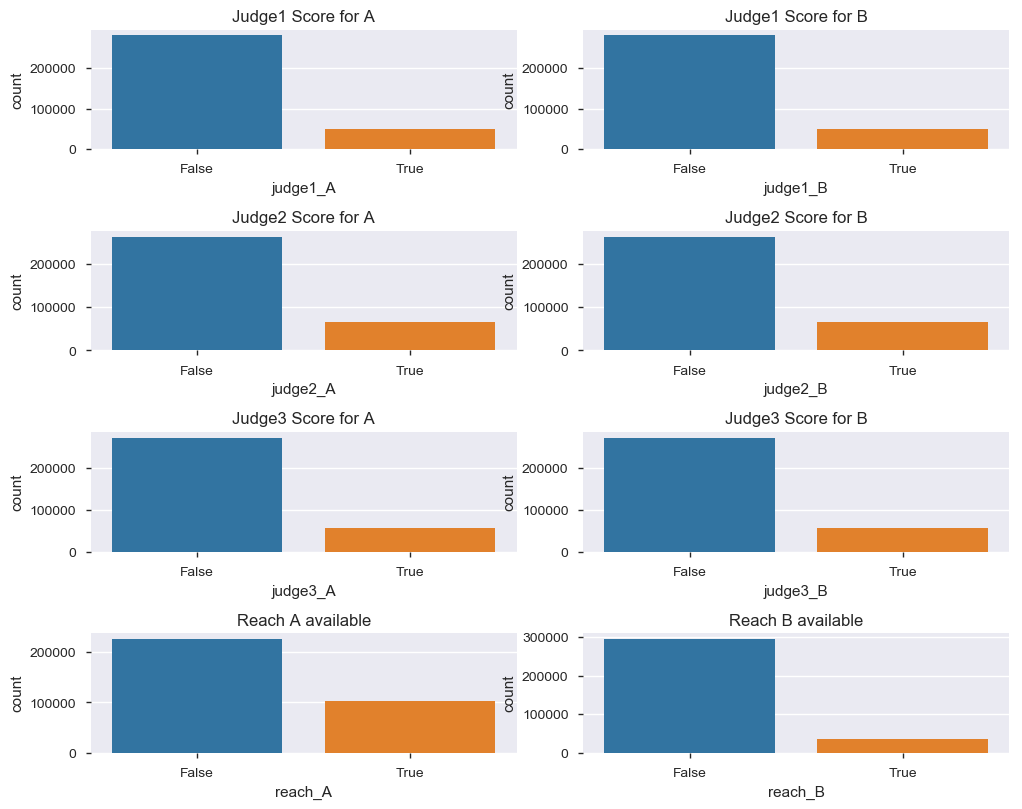

In [240]:
## Check the NULLs of judges

fig, ax =plt.subplots(4,2,figsize=(10,8))

ax[0,0].set_title('Judge1 Score for A')
ax[0,0].set_xlabel('Judge1_A')
ax[0,1].set_title('Judge1 Score for B')
ax[1,0].set_title('Judge2 Score for A')
ax[1,1].set_title('Judge2 Score for B')
ax[2,0].set_title('Judge3 Score for A')
ax[2,1].set_title('Judge3 Score for B')
ax[3,0].set_title('Reach A available')
ax[3,1].set_title('Reach B available')
plt.tight_layout() 
sns.countplot(data= df['judge1_A'].notnull().reset_index(), x = 'judge1_A',ax=ax[0,0])
sns.countplot(data= df['judge1_B'].notnull().reset_index(), x = 'judge1_B',ax=ax[0,1])
sns.countplot(data= df['judge2_A'].notnull().reset_index(), x = 'judge2_A',ax=ax[1,0])
sns.countplot(data= df['judge2_B'].notnull().reset_index(), x = 'judge2_B',ax=ax[1,1])
sns.countplot(data= df['judge3_A'].notnull().reset_index(), x = 'judge3_A',ax=ax[2,0])
sns.countplot(data= df['judge3_B'].notnull().reset_index(), x = 'judge3_B',ax=ax[2,1])
sns.countplot(data= df['reach_A'].notnull().reset_index() , x = 'reach_A', ax=ax[3,0])
sns.countplot(data= df['reach_B'].notnull().reset_index() , x = 'reach_B', ax=ax[3,1])

## Out of 387426 rows
## Approximately 50K rows has value for judge 1 score(for both A and B).Rest of the rows has NULL values.
## Approximately 75K rows has value for judge 2 score(for both A and B).Rest of the rows has NULL values.
## Approximately 50K rows has value for judge 3 score(for both A and B).Rest of the rows has NULL values.

#####  Delete Judge1_A,Judge1_B,Judge2_A,Judge2_B,Judge3_A,Judge3_B since there are too many missing values
#####  Delete height_A,height_B, reach_A, reach_B, weight_A,weight_B since there are too many missing values

In [241]:
df.drop(columns = ['judge1_A','judge1_B','judge2_A','judge2_B','judge3_A','judge3_B', 'reach_A', 'reach_B'],inplace = True)

##### check if stance_A and stance_B are duplicate columns

In [242]:
## ## 

def checksame(cols):
    stance_A = cols[0]
    stance_B = cols[1]
    #if np.isnan(stance_A) | np.isnan(stance_B):
        #return False
    #else:    
    return  (stance_A != stance_B)

df[df[['stance_A','stance_B']].notnull().apply(checksame, axis = 1)].shape



(0, 18)

This means all the non NULL columns has the same stance_A and stance_B values. SO we cannot use them to make any prediction based on these columns

In [243]:
## Delete stance_A and stance_B since there 2 columns values are same for all the rows

df.drop(columns = ['stance_A','stance_B'],inplace = True)

We saw that the height and weight values are missing for most of the rows. But lets look at its impact before dropping those columns.

In [244]:
## Does height really determines the winning factor

df['height diff'] = df['height_A'] - df['height_B']
df['weight diff']=  df['weight_A'] - df['weight_B']

(1521, 18)

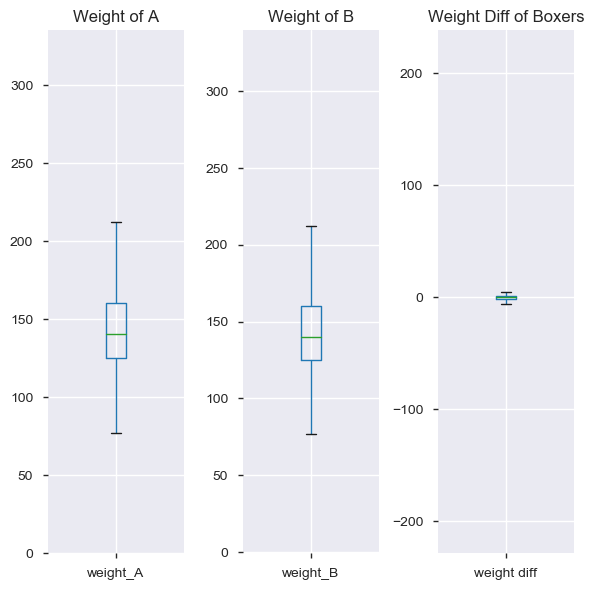

In [245]:
f,ax = plt.subplots(1,3,figsize=(6,6))
ax[0].set_title('Weight of A')
ax[1].set_title('Weight of B')
ax[2].set_title('Weight Diff of Boxers')
plt.tight_layout()
df[df['weight diff'].notnull()& ((df['weight diff'] > -30)& (df['weight diff'] < 30))].boxplot(column = ['weight_A'],ax=ax[0])
df[df['weight diff'].notnull()& ((df['weight diff'] > -30)& (df['weight diff'] < 30))].boxplot(column = ['weight_B'],ax=ax[1])
df[df['weight diff'].notnull()].boxplot(column = ['weight diff'],ax=ax[2])

df[(df['weight diff'].notnull()) & ((df['weight diff'] < -20)|(df['height diff'] > 20))].shape

(477, 18)

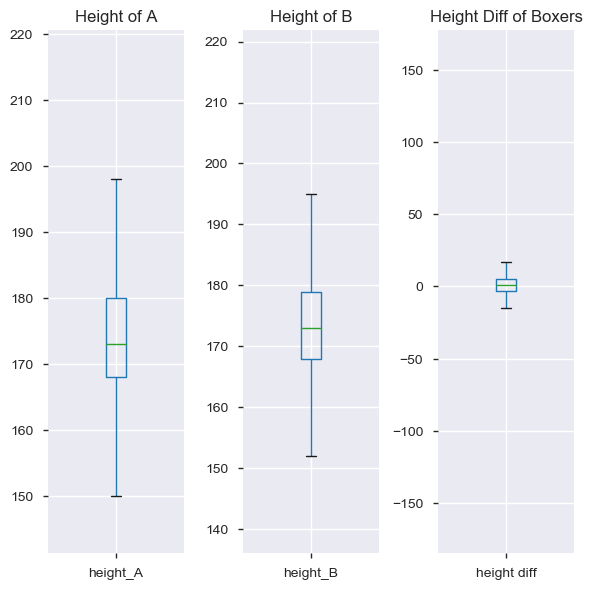

In [246]:
f,ax = plt.subplots(1,3,figsize=(6,6))
ax[0].set_title('Height of A')
ax[1].set_title('Height of B')
ax[2].set_title('Height Diff of Boxers')
plt.tight_layout()
df[df['height diff'].notnull()& ((df['height diff'] > -30)& (df['height diff'] < 30))].boxplot(column = ['height_A'],ax=ax[0])
df[df['height diff'].notnull()& ((df['height diff'] > -30)& (df['height diff'] < 30))].boxplot(column = ['height_B'],ax=ax[1])
df[df['height diff'].notnull()].boxplot(column = ['height diff'],ax=ax[2])
df[(df['height diff'].notnull()) & ((df['height diff'] < -20)|(df['height diff'] > 20))].shape

In [247]:
df['height advantage Indicator for B']= 'N'
df['height advantage Indicator for A']= 'N'
df['weight advantage Indicator for B']= 'N'
df['weight advantage Indicator for A']= 'N'

df['height advantage Indicator for B']= df[(df['height diff'].notnull()) &(df['result']== 'win_B') & (df['height diff'] < 0)]['height advantage Indicator for B'].apply(lambda x : 'Y')
df['height advantage Indicator for B'].fillna('N', inplace= True)

df['height advantage Indicator for A']= df[(df['height diff'].notnull()) &(df['result']== 'win_A') & (df['height diff'] > 0)]['height advantage Indicator for A'].apply(lambda x : 'Y')
df['height advantage Indicator for A'].fillna('N', inplace= True)

df['weight advantage Indicator for B']= df[(df['weight diff'].notnull()) &(df['result']== 'win_B') & (df['weight diff'] < 0)]['weight advantage Indicator for B'].apply(lambda x : 'Y')
df['weight advantage Indicator for B'].fillna('N', inplace= True)

df['weight advantage Indicator for A']= df[(df['weight diff'].notnull()) &(df['result']== 'win_A') & (df['weight diff'] > 0)]['weight advantage Indicator for A'].apply(lambda x : 'Y')
df['weight advantage Indicator for A'].fillna('N', inplace= True)

Text(0.5,1,'A boxer with weight advantage winning')

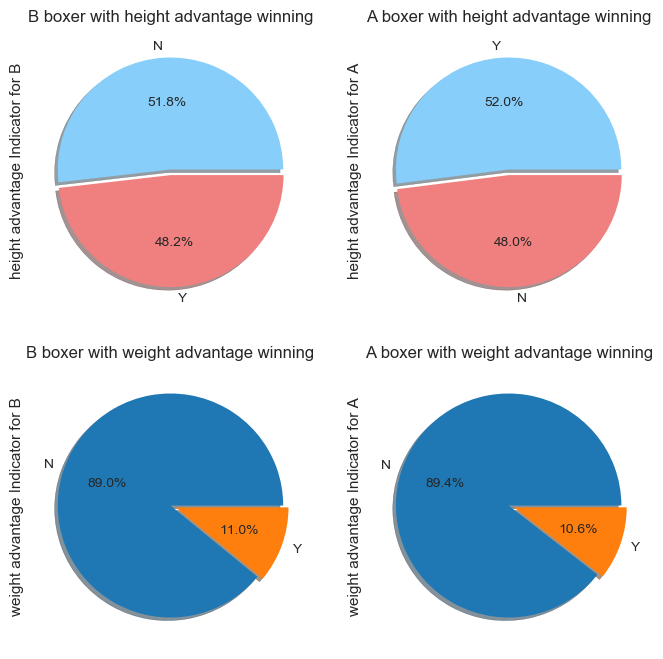

In [248]:
f,ax = plt.subplots(2,2,figsize=(8,8))
colors = ['lightskyblue', 'lightcoral']
df[(df['height diff'].notnull()) &(df['result']== 'win_B')]['height advantage Indicator for B'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%',ax=ax[0,0],colors=colors,shadow=True)
df[(df['height diff'].notnull()) &(df['result']== 'win_A')]['height advantage Indicator for A'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%',ax=ax[0,1],colors=colors,shadow=True)
df[(df['height diff'].notnull()) &(df['result']== 'win_B')]['weight advantage Indicator for B'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%',ax=ax[1,0],shadow=True)
df[(df['height diff'].notnull()) &(df['result']== 'win_A')]['weight advantage Indicator for A'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%',ax=ax[1,1],shadow=True)

ax[0,0].set_title('B boxer with height advantage winning')
ax[0,1].set_title('A boxer with height advantage winning')
ax[1,0].set_title('B boxer with weight advantage winning')
ax[1,1].set_title('A boxer with weight advantage winning')

We see in the above curve that weight advantage doesnt make much difference in deciding the winner
However boxer with height advantage does have better chance of make an impact on deciding the winner.

In [249]:
## Now lets see the impact of height and weight when the age of the boxers is in the same range (21-26)

df['height advantage Indicator for B']= 'N'
df['height advantage Indicator for A']= 'N'
df['weight advantage Indicator for B']= 'N'
df['weight advantage Indicator for A']= 'N'

df['height advantage Indicator for B']= df[(df['height diff'].notnull()) &(df['result']== 'win_B') & (df['age_A'].apply(lambda x: ((x > 20) & (x < 27)))) & (df['age_B'].apply(lambda x: ((x > 20) & (x < 27)))) & (df['height diff'] < 0)]['height advantage Indicator for B'].apply(lambda x : 'Y')
df['height advantage Indicator for B'].fillna('N', inplace= True)

df['height advantage Indicator for A']= df[(df['height diff'].notnull()) &(df['result']== 'win_A') & (df['age_A'].apply(lambda x: ((x > 20) & (x < 27)))) & (df['age_B'].apply(lambda x: ((x > 20) & (x < 27)))) & (df['height diff'] > 0)]['height advantage Indicator for A'].apply(lambda x : 'Y')
df['height advantage Indicator for A'].fillna('N', inplace= True)

df['weight advantage Indicator for B']= df[(df['weight diff'].notnull()) &(df['result']== 'win_B') & (df['age_A'].apply(lambda x: ((x > 20) & (x < 27)))) & (df['age_B'].apply(lambda x: ((x > 20) & (x < 27)))) & (df['weight diff'] < 0)]['weight advantage Indicator for B'].apply(lambda x : 'Y')
df['weight advantage Indicator for B'].fillna('N', inplace= True)

df['weight advantage Indicator for A']= df[(df['weight diff'].notnull()) &(df['result']== 'win_A') & (df['age_A'].apply(lambda x: ((x > 20) & (x < 27)))) & (df['age_B'].apply(lambda x: ((x > 20) & (x < 27)))) & (df['weight diff'] > 0)]['weight advantage Indicator for A'].apply(lambda x : 'Y')
df['weight advantage Indicator for A'].fillna('N', inplace= True)

Text(0.5,1,'A boxer with weight advantage winning')

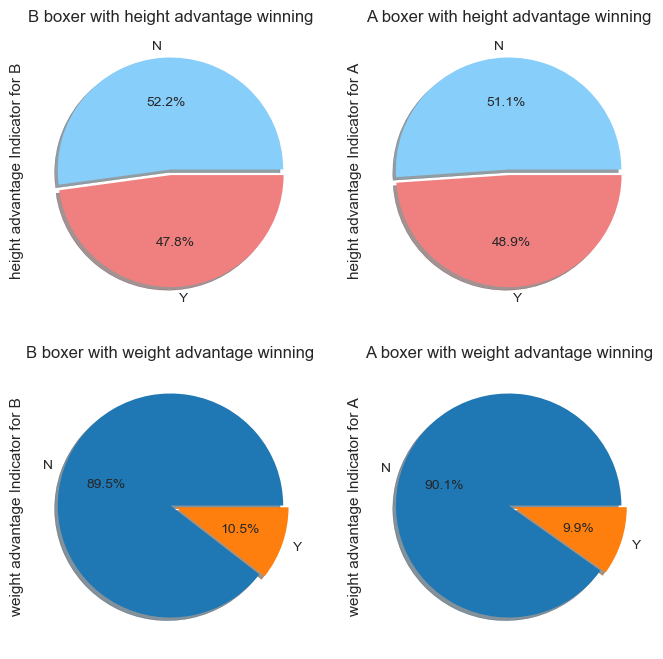

In [250]:
f,ax = plt.subplots(2,2,figsize=(8,8))
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
colors = ['lightskyblue', 'lightcoral']
#colors = ['lightcoral','lightskyblue','brown','orange','black','blue','purple','magenta', 'cyan']
df[(df['height diff'].notnull()) &(df['result']== 'win_B') & (df['age_A'].apply(lambda x: ((x > 20) & (x < 27)))) & (df['age_B'].apply(lambda x: ((x > 20) & (x < 27)))) ]['height advantage Indicator for B'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%',ax=ax[0,0],colors=colors,shadow=True)
df[(df['height diff'].notnull()) &(df['result']== 'win_A') & (df['age_A'].apply(lambda x: ((x > 20) & (x < 27)))) & (df['age_B'].apply(lambda x: ((x > 20) & (x < 27)))) ]['height advantage Indicator for A'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%',ax=ax[0,1],colors=colors,shadow=True)
df[(df['height diff'].notnull()) &(df['result']== 'win_B') & (df['age_A'].apply(lambda x: ((x > 20) & (x < 27)))) & (df['age_B'].apply(lambda x: ((x > 20) & (x < 27)))) ]['weight advantage Indicator for B'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%',ax=ax[1,0],shadow=True)
df[(df['height diff'].notnull()) &(df['result']== 'win_A') & (df['age_A'].apply(lambda x: ((x > 20) & (x < 27)))) & (df['age_B'].apply(lambda x: ((x > 20) & (x < 27)))) ]['weight advantage Indicator for A'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%',ax=ax[1,1],shadow=True)

ax[0,0].set_title('B boxer with height advantage winning')
ax[0,1].set_title('A boxer with height advantage winning')
ax[1,0].set_title('B boxer with weight advantage winning')
ax[1,1].set_title('A boxer with weight advantage winning')

We see in the above curve that when the age ofthe boxer is in the same range, the same trend is followed for height and weight.
Here as well, weight advantage doesnt make much difference in deciding the winner However boxer with height advantage does have better chance of winning the match

Ideally, we would like to have the height columns.But we have to drop them since there are too many missing values.

In [251]:
## Delete height and weight columns since there are too many missing values

df.drop(columns = ['height_A','height_B', 'weight_A','weight_B'],inplace = True)


In [252]:
## Delete the columns that is created for checking the impact of hieght and weight

df.drop(columns = ['height diff','weight diff'], inplace = True)
df.drop(columns = ['height advantage Indicator for B', 'height advantage Indicator for A'],inplace = True)
df.drop(columns = ['weight advantage Indicator for B', 'weight advantage Indicator for A'],inplace = True)

Age column:
We have already seen there are missing values in age columns. A has less age missing. However B has more ages missing.But lets look deeper into this.

In [253]:
df['age_A'].unique().astype(int)

array([         35,          26,          28,          25,          24,
                23,          36,          27,          22,          21,
                20,          19,          18,          17,          16,
                15,          29,          30,          33,          34,
                32,          31,          38,          37,          39,
                42, -2147483648,          51,          43,          40,
                44,          48,          45,          46,          41,
                47,          14,          50,          49,          13,
                12,          52,          11,          53,          -4,
                54,        1818,        1817,          59,           9,
                55,           6,           5,         224,          10,
               -74,           8,           7])

There are negetive , huge positive and NAN values for age_A coulmn. We will fix it.

In [254]:
df['age_B'].unique().astype(int)

array([         27,          31,          26,          29,          35,
                23,          22,          28,          40,          32,
                30,          34,          39,          38,          21,
       -2147483648,          20,          37,          25,          36,
                19,          18,          33,          24,          41,
                47,          17,          45,          49,          15,
                43,          42,          44,          16,          14,
                11,          46,          51,          48,         102,
                50,          10,         101,          99,          57,
               126,          54,          13,         227,          12,
                52,           9,          56,        2015,           1,
                 0,          53,        1817,         106,         104,
                 5,           8,         121,        2016,          60,
               132,          59,        1786,        1910,      

There are negetive , huge positive and NAN values for age_B coulmn. 

In [255]:
df[df['age_B'].isnull()].shape

## This is a problem. Almost 33% of the ages for B is missing 
##Lets fill this columns

(94508, 12)

Almost 33% of the age_B is missing.Thats a problem. Ideally we should drop the age. But lets keep it for now.

In [256]:
df[df['age_A'].isnull()].shape

##Lets fill this columns

(18222, 12)

Around 8% of the age_A is missing.

Lets see the distribution of Ages for A and B

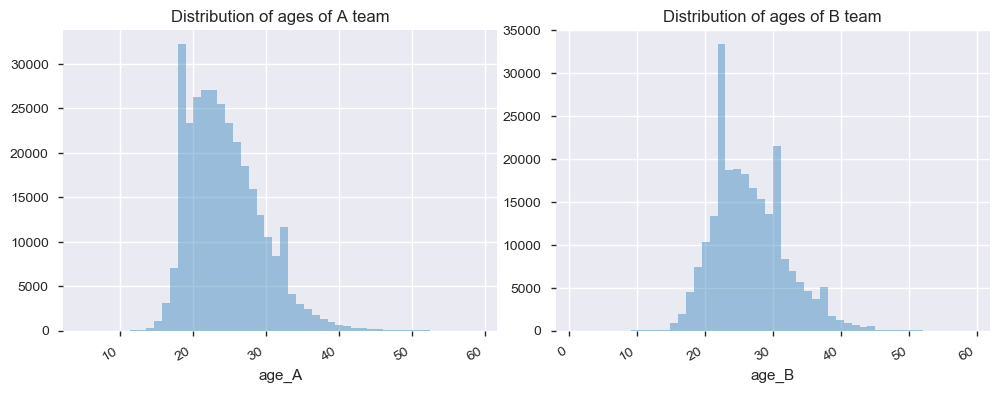

In [257]:
#df[df['result']== 'win_A']['age_A'].value_counts().sort_values()

##Here we have taken the boxer of age > 10.
## Distribution of age_A
fig, ax =plt.subplots(1,2,figsize=(10,4))
plt.tight_layout() 
ax[0].set_title('Distribution of ages of A team')

sns.distplot(df[(df['age_A'] > 0) & (df['age_A'] < 60)& (df['age_A'].notnull())]['age_A'],kde =False, ax = ax[0])
fig.autofmt_xdate()
## Distribution of age_B
ax[1].set_title('Distribution of ages of B team')
sns.distplot(df[(df['age_B'] > 0) & (df['age_B'] < 60) & (df['age_B'].notnull())]['age_B'],kde =False, ax = ax[1])

## Here we see more number of boxer of B has age >=40 compared to A. This may also lead to more defeats for boxer B

Lets  see the impact of age on the result :

In [258]:
## Lets create a new column
df['age diff'] = df['age_A']- df['age_B']

**Plot of result as the age of boxer A increases**

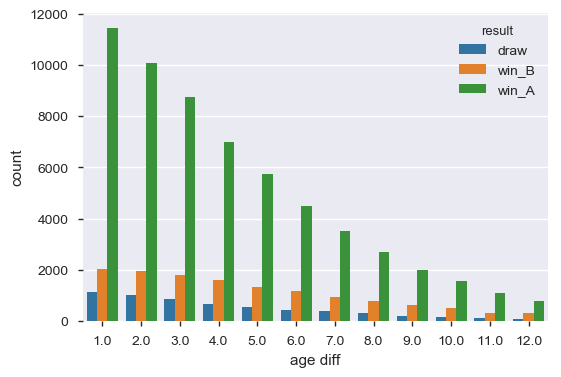

In [259]:
fig, ax =plt.subplots(1,1,figsize=(6,4))
sns.countplot(data = df[(df['age diff'] > 0) & (df['age diff'] <= 12)],x = 'age diff', hue = 'result')

Here we see as the age difference decreases,the chances of draw siginificantly increases.
Boxer A wins over boxer B irrespective of the age difference

As the age of Boxer A increases compared to Boxer B, the chance of Boxer A winning decreases significantly.

**Plot of result as the age of boxer B increases**

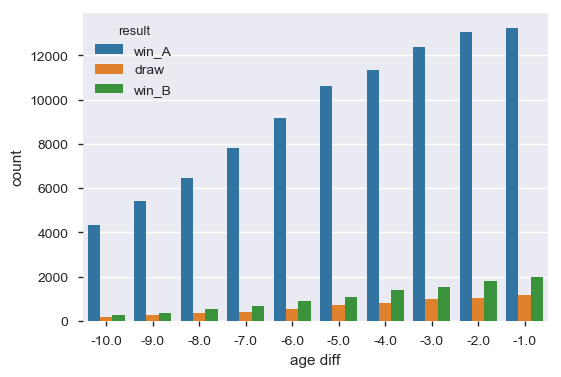

In [260]:
fig, ax =plt.subplots(1,1,figsize=(6,4))
sns.countplot(data = df[(df['age diff'] < 0) & (df['age diff'] >= -10)],x = 'age diff', hue = 'result')

Again we see, as the age difference decreases,the chances of draw siginificantly increases. 

Here we are also see that as the age of Boxer B increases compared to Boxer A, the chance of Boxer B winning decreases significantly.



Ideally I should go and check if I can get the age from the source.
If not I should delete the age column. But I am keeping and filling it for now

**Since the ages are missing for too many column, we are creating a new indicator which would tell us if the age was originally missing or not**

In [261]:
##Before filling the age column lets create a column which says if the age was originally missing or not
## We are only setting this indicator for NULL values
## for values <0 or >60 we are not doing so

df['missing_age_A'] = df['age_A'].apply(lambda x: (x != x))
df['missing_age_B'] = df['age_B'].apply(lambda x: (x != x))

**A boxer of age less zero is not possible.**
**A Boxer with age > 60 seems to be unrealistic.**
**Lets replace these age values.**

In [262]:
medianA = df['age_A'].dropna().median()
medianB = df['age_B'].dropna().median()

#Lets replace the age < 0 and > 60 with median as well

df.loc[df['age_A'] < 0, 'age_A'] = medianA
df.loc[df['age_A'] > 60, 'age_A'] = medianA

df.loc[df['age_B'] < 0, 'age_B'] = medianB
df.loc[df['age_B'] > 60, 'age_B'] = medianB

Lets create a new columns total matches and 
see if the ages is correlated to the total number of matches that the boxer has played 

In [263]:
df['total match A'] = df['won_A'] + df['lost_A'] + df['drawn_A'] 
df['total match B'] = df['won_B'] + df['lost_B'] + df['drawn_B'] 

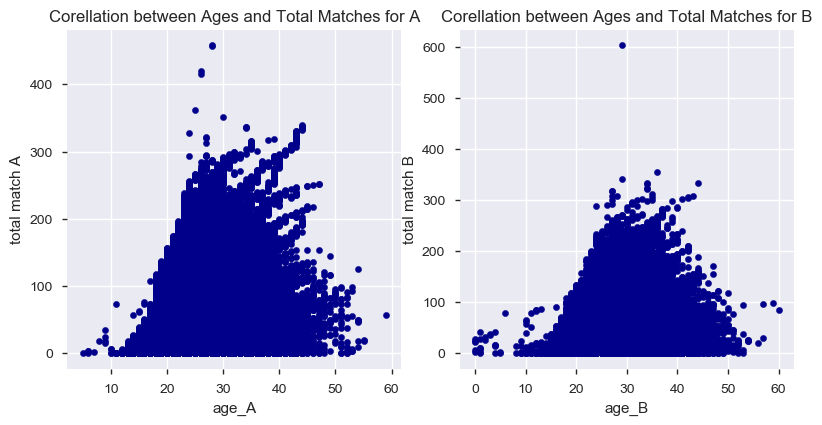

In [264]:
fig, ax =plt.subplots(1,2,figsize=(8,4))
plt.tight_layout() 
ax[0].set_title('Corellation between Ages and Total Matches for A')
ax[1].set_title('Corellation between Ages and Total Matches for B')
df.plot.scatter(x='age_A',y='total match A', c='DarkBlue', ax=ax[0])
df.plot.scatter(x='age_B',y='total match B', c='DarkBlue', ax=ax[1])

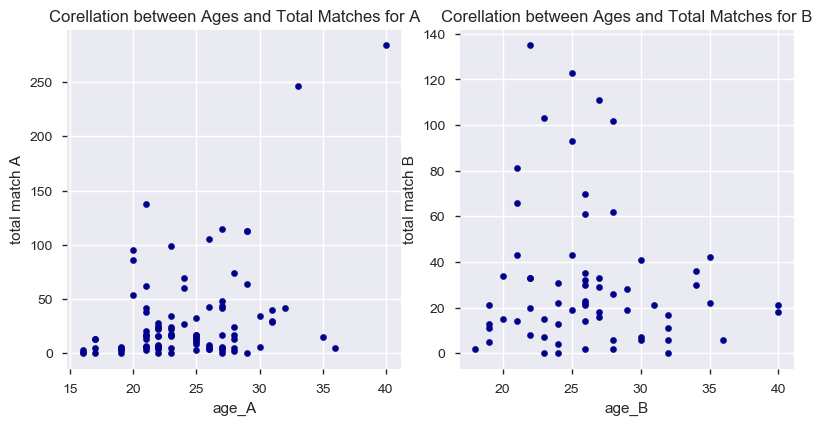

In [265]:
fig, ax =plt.subplots(1,2,figsize=(8,4))
plt.tight_layout() 
ax[0].set_title('Corellation between Ages and Total Matches for A')
ax[1].set_title('Corellation between Ages and Total Matches for B')
df.sample(100).plot.scatter(x='age_A',y='total match A', c='DarkBlue', ax=ax[0])
df.sample(100).plot.scatter(x='age_B',y='total match B', c='DarkBlue', ax=ax[1])

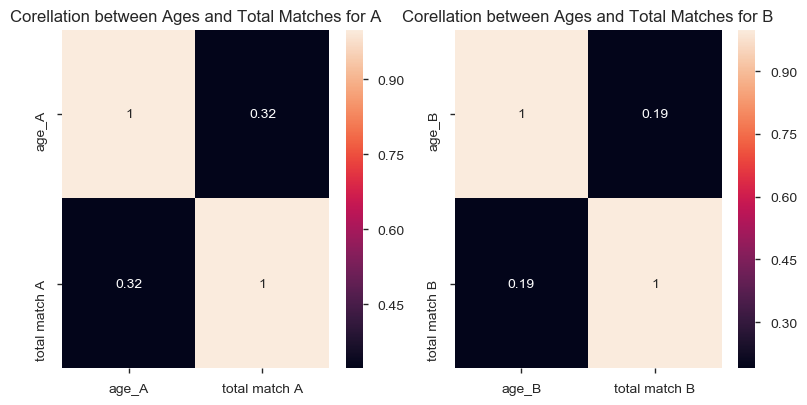

In [266]:
fig, ax =plt.subplots(1,2,figsize=(8,4))
plt.tight_layout() 
ax[0].set_title('Corellation between Ages and Total Matches for A')
ax[1].set_title('Corellation between Ages and Total Matches for B')
sns.heatmap(df[['age_A','total match A']].corr(),annot = True,ax = ax[0])
sns.heatmap(df[['age_B','total match B']].corr(),annot = True,ax = ax[1])

## age and total matches are not well correlated

age and total match are not well correlated. SO we will use median to fill the missing values

In [267]:
medianA = df['age_A'].dropna().median()
medianB = df['age_B'].dropna().median()
df['age_A'].fillna(medianA,inplace=True)
df['age_B'].fillna(medianB,inplace=True)

Apart from age we have lost,won,drawn and kos columns

**The no of knockouts by a boxer should always be less than or equal to the number of wins.Lets verify**

In [268]:
##for Boxer A
df[df['won_A'] < df['kos_A']].shape

## 

(7, 17)

These must be data errors for Boxer A

In [269]:
##for Boxer B
df[df['won_B'] < df['kos_B']].shape

## these must be data errors for Boxer B

(4, 17)

These must be data errors for Boxer B

Lets fix these rows

In [270]:
#Lets Fix the won_B for these rows
def fixwon(cols):
    won_AB = cols[0]
    kos_AB = cols[1]
    if won_AB < kos_AB:
        return kos_AB
    else:
        return won_AB

df['won_B'] = df[['won_B','kos_B']].apply(fixwon,axis =1)

# Lets Fix the the won_A for these rows

df['won_A'] = df[['won_A','kos_A']].apply(fixwon,axis =1)

In [271]:
df.shape

(329636, 17)

We would need values in lost, won, drawn and kos columns to use them for prediction.Lets verify

In [272]:
df2= df[((df['lost_A'] == 0) & (df['won_A'] == 0) & ( df['drawn_A'] == 0))]
df3= df[((df['lost_B'] == 0) & (df['won_B'] == 0) & ( df['drawn_B'] == 0))]
print(df2['result'].value_counts())
print('\n')
print(df3['result'].value_counts())

win_A    12828
win_B     1226
draw       769
Name: result, dtype: int64


win_A    22675
win_B     1545
draw      1304
Name: result, dtype: int64


These are new freshers .Either A or B hasn't played any match

These means there are around 40K entries of Boxers where the Boxer has not played any macthed prior to the current match.
So these are new ameteur Boxers. B has more new ameteur boxers than A. 

We also see that Ameteur Boxer of A is performing exceedingly well while Ameteur Boxer of B is lossing most of the matches.

In [273]:
## Delete the rows where there is no details for A to predict the result (apart from age)
#df = df[~((df['lost_A'] == 0) & (df['won_A'] == 0) &( df['drawn_A'] == 0))]
## Delete the rows where there is no details for B to predict the result (apart from age)
#df = df[~((df['lost_B'] == 0) & (df['won_B'] == 0) &( df['drawn_B'] == 0))]

## kos is not considered here kos should be counted in the wins for the boxer

In [274]:
df.shape

(329636, 17)

In [275]:
df[((df['lost_A'] == 0) & (df['won_A'] == 0) &( df['drawn_A'] == 0) & (df['lost_B'] == 0) & (df['won_B'] == 0) &( df['drawn_B'] == 0) & (df['result']== 'draw'))].shape

(278, 17)

In [276]:
## Lets create won percentage and total match column

df['total match A'] = df['won_A'] + df['lost_A'] + df['drawn_A'] #+ df['kos_A']
df['total match B'] = df['won_B'] + df['lost_B'] + df['drawn_B'] #+ df['kos_B']

df['won percentage A'] = (df['won_A']/df['total match A'])*100
df['won percentage B'] = (df['won_B']/df['total match B'])*100

## Lets create lost percentage columns

df['lost percentage A'] = (df['lost_A']/df['total match A'])*100
df['lost percentage B'] = (df['lost_B']/df['total match B'])*100

## FIll values for rows new Boxers who has not played any match yet
df['lost percentage A'].fillna(0, inplace = True)
df['lost percentage B'].fillna(0, inplace = True)
df['won percentage A'].fillna(0, inplace = True)
df['won percentage B'].fillna(0, inplace = True)

In [277]:
##  Lets create kos percentage columns

df['kos percentage A'] = df['kos_A']/df['won_A']*100
df['kos percentage B'] = df['kos_B']/df['won_B']*100

In [278]:
#This would resolve the NULL values for rows where boxer has not won any matches yet
df['kos percentage A'].fillna(0, inplace = True)
df['kos percentage B'].fillna(0, inplace = True)

df.drop(columns=['age diff'], inplace = True)

In [279]:
df['decision'].unique()

array(['SD', 'UD', 'KO', 'TKO', 'MD', 'RTD', 'TD', 'PTS', 'DQ', 'NWS'],
      dtype=object)

**If the decison is knock out, the result has to be a win .Lets verify that**

In [280]:
##the result has to be a win if any one of the boxer is knocked out
df[(df['result']== 'draw') & ((df['decision']== 'TKO')| (df['decision']== 'KO'))].shape

(0, 22)

##### Comparion of B's wins (with and without performance advantage)

win_A    16492
win_B     8390
draw      2616
Name: result, dtype: int64
win_A    44995
win_B    17428
draw      6622
Name: result, dtype: int64


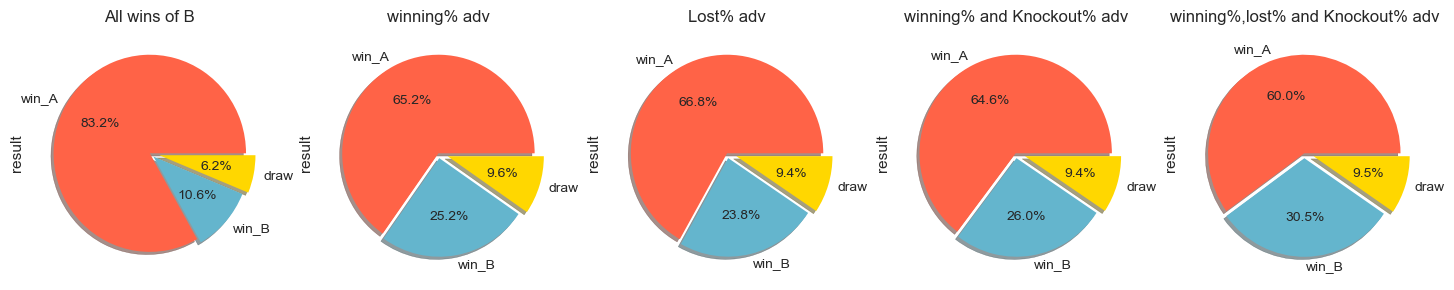

In [281]:
f,ax = plt.subplots(1,5,figsize=(18,3.2))
colors = ['tomato', 'c','gold']
ax[0].set_title('All wins of B')
ax[1].set_title("winning% adv")
ax[3].set_title("winning% and Knockout% adv")
ax[2].set_title("Lost% adv")
ax[4].set_title("winning%,lost% and Knockout% adv")
df['result'].value_counts().plot.pie(explode=[0,0.05,0.1],colors=colors, autopct='%1.1f%%',ax=ax[0],shadow=True)
df[ (df['won percentage A']< df['won percentage B'])]['result'].value_counts().plot.pie(explode=[0,0.05,0.1],colors=colors, autopct='%1.1f%%',ax=ax[1],shadow=True)
df[ (df['won percentage A']< df['won percentage B']) & (df['kos percentage A']< df['kos percentage B'])]['result'].value_counts().plot.pie(explode=[0,0.05,0.1],colors=colors, autopct='%1.1f%%',ax=ax[3],shadow=True)
df[ (df['lost percentage A']> df['lost percentage B'])]['result'].value_counts().plot.pie(explode=[0,0.05,0.1],colors=colors, autopct='%1.1f%%',ax=ax[2],shadow=True)
df[ (df['lost percentage A']> df['lost percentage B']) & (df['won percentage A']< df['won percentage B']) & (df['kos percentage A']< df['kos percentage B'])]['result'].value_counts().plot.pie(explode=[0,0.05,0.1],colors=colors, autopct='%1.1f%%',ax=ax[4],shadow=True)

print(df[ (df['lost percentage A']> df['lost percentage B']) & (df['won percentage A']< df['won percentage B']) & (df['kos percentage A']< df['kos percentage B'])]['result'].value_counts())
print(df[ (df['won percentage A']< df['won percentage B'])]['result'].value_counts())

We see the rate of B's wins increase 2.5 times when B has better winning rate. The chances of A winning drops from 83% to 65%

The chances increase even further if the boxer has better knockout rate as well.

##### Comparion of A's wins (with and without performance advantage)

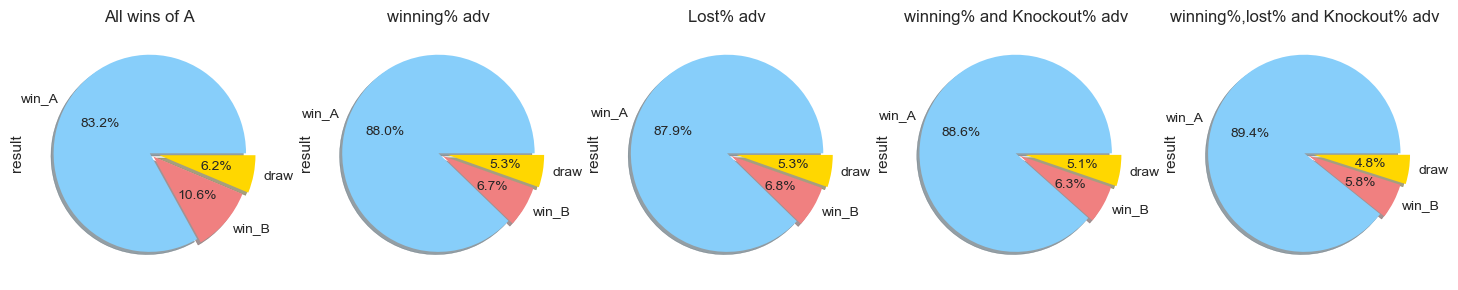

In [282]:
f,ax = plt.subplots(1,5,figsize=(18,3.2))
colors = ['lightskyblue', 'lightcoral','gold']
ax[0].set_title('All wins of A')
ax[1].set_title("winning% adv")
ax[3].set_title("winning% and Knockout% adv")
ax[2].set_title("Lost% adv")
ax[4].set_title("winning%,lost% and Knockout% adv")
df['result'].value_counts().plot.pie(explode=[0,0.05,0.1],colors=colors, autopct='%1.1f%%',ax=ax[0],shadow=True)
df[ (df['won percentage A']>= df['won percentage B'])]['result'].value_counts().plot.pie(explode=[0,0.05,0.1],colors=colors, autopct='%1.1f%%',ax=ax[1],shadow=True)
df[ (df['won percentage A']>= df['won percentage B']) & (df['kos percentage A']>= df['kos percentage B'])]['result'].value_counts().plot.pie(explode=[0,0.05,0.1],colors=colors, autopct='%1.1f%%',ax=ax[3],shadow=True)
df[ (df['lost percentage A']<= df['lost percentage B'])]['result'].value_counts().plot.pie(explode=[0,0.05,0.1],colors=colors, autopct='%1.1f%%',ax=ax[2],shadow=True)
df[ (df['lost percentage A']<= df['lost percentage B']) & (df['won percentage A']>= df['won percentage B']) & (df['kos percentage A']>= df['kos percentage B'])]['result'].value_counts().plot.pie(explode=[0,0.05,0.1],colors=colors, autopct='%1.1f%%',ax=ax[4],shadow=True)

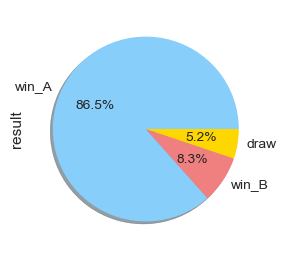

In [283]:
##New Boxer of A
f,ax = plt.subplots(1,1,figsize=(3,3))
colors = ['lightskyblue', 'lightcoral','gold']
df[(df['total match A']==0)]['result'].value_counts().plot.pie(colors=colors, autopct='%1.1f%%',ax=ax,shadow=True)

In [284]:
df[df['won percentage A'] > 90]['result'].value_counts()

win_A    99332
win_B     5423
draw      3184
Name: result, dtype: int64

###### It would be very hard to predict a draw. So we will convert these draw to either wins of A or B


       Before updating the draw result...Lets look at the undecided matches and its impact on draw matches
       How many of the Undecided(UD) matches A and B is winning?

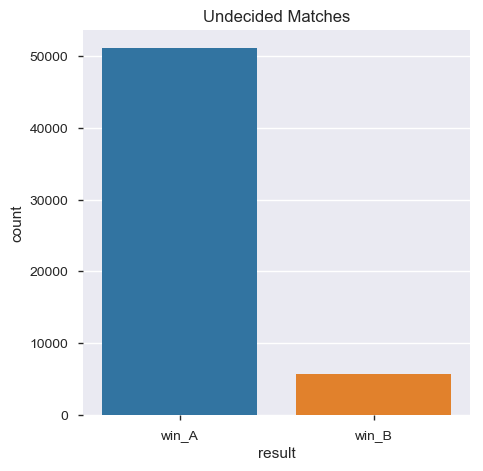

In [285]:
## Before updating the draw result...Lets look at the undecided matches and its impact on draw matches
f,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_title('Undecided Matches')
sns.countplot(x= 'result', data = df[(df['decision']== 'UD')],ax=ax)

## 

We see that if the decision is Undecided (UD), the match result doesn't end up with a draw. 
A is winning most of these undecided matches. A is almost 10 times more likely to win than B if the decision is Undecided (UD).

**I DONT KNOW THE REASON FOR THIS**

In [286]:
df[((df['lost_A'] == 0) & (df['won_A'] == 0) &( df['drawn_A'] == 0) & (df['lost_B'] == 0) & (df['won_B'] == 0) &( df['drawn_B'] == 0) & (df['result']== 'draw'))].shape

(278, 22)

In [287]:
#First we will delete the draws where there is not much information about the boxers

df= df[~((df['lost_A'] == 0) & (df['won_A'] == 0) &( df['drawn_A'] == 0) & (df['lost_B'] == 0) & (df['won_B'] == 0) &( df['drawn_B'] == 0) & (df['result']== 'draw'))]

##### We will use the above comparion to replace the value of result when its draw

In [381]:
df['org_result'] = df['result']

In [289]:
def update_result(cols):
    won_percentage_A = cols[0]
    won_percentage_B = cols[1] 
    total_match_A = cols[2]
    result = cols[3]
    if result == 'draw':
        
        if (won_percentage_A >= won_percentage_B) | (total_match_A) |(won_percentage_A > 90):
            return 'win_A'
        else:
            return 'win_B'
    else:
        return result
    
    
df['result'] = df[['won percentage A','won percentage B','total match A','result']].apply(update_result, axis =1)

In [290]:
df['result'].value_counts()

win_A    294040
win_B     35318
Name: result, dtype: int64

## 3.4 Post Pandas Profiling


In [291]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile

Number of variables,24
Number of observations,329358
Total Missing (%),0.0%
Total size in memory,55.9 MiB
Average record size in memory,178.0 B
Numeric,17
Categorical,3
Boolean,2
Date,0
Text (Unique),0
Rejected,2


Now we have preprocessed the data, now the dataset doesnot contain missing values, we have also introduced new feature named __total match A__ , __total match B__ , __won percentage A__ , __won percentage B__, __kos percentage A__ and __kos percentage A__. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights.

We see that __total match__ and __won__ columns are highly correlated. This is expected since one of them are derived columns.


### 4. Questions

### 4.1 Of all the fights, who has won more fights (A or B) ?

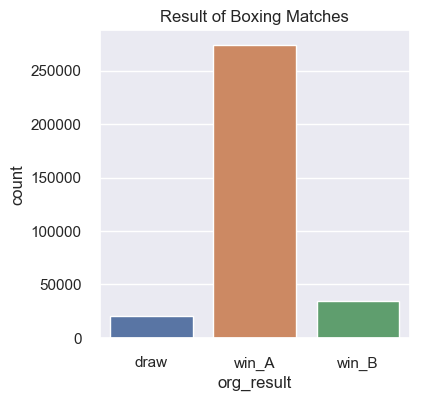

In [293]:
f,ax = plt.subplots(1,1,figsize=(4,4))
sns.set(style="darkgrid")
ax.set_title('Result of Boxing Matches')
sns.countplot(x= 'org_result', data = df,ax=ax)


A has won most number of fights. The number of draw is considerably low

### 4.2 What is the reason of winning the fight ?

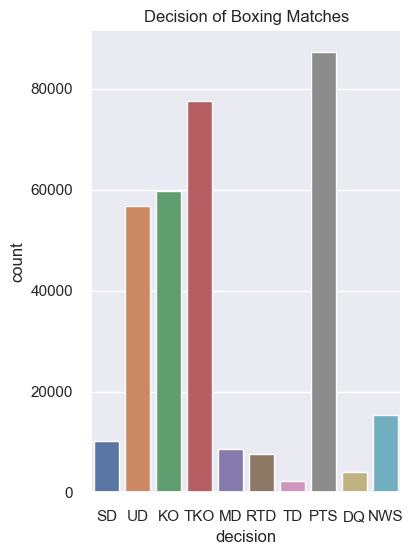

In [336]:
f,ax = plt.subplots(1,1,figsize=(4,6))
ax.set_title('Decision of Boxing Matches')
sns.countplot(x= 'decision', data = df,ax=ax)


Knockout is the most likely reason for win (KO + TKO).
Win by points (PTS) is also very high. Infact PTS is the most likely decision

### 4.3 How is A Boxer's winning most of the fight ?

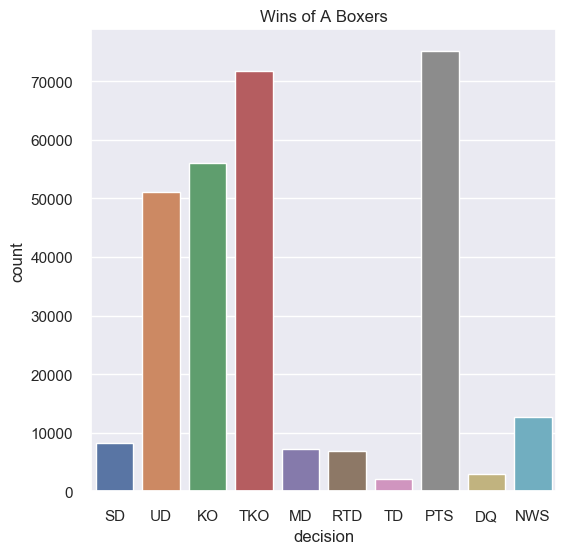

In [337]:
f,ax = plt.subplots(1,1,figsize=(6,6))
ax.set_title('Wins of A Boxers')
sns.countplot(x= 'decision', data = df[df['result']== 'win_A'],ax= ax)


Boxer A won the fight by knocking out(TKO + KO) boxer B most of the times.
A points decision is the 2nd most highest reason for A's wins.
A large number of undecided matches has the result as win_A

### 4.4 How is B Boxer's winning most of the fight ?

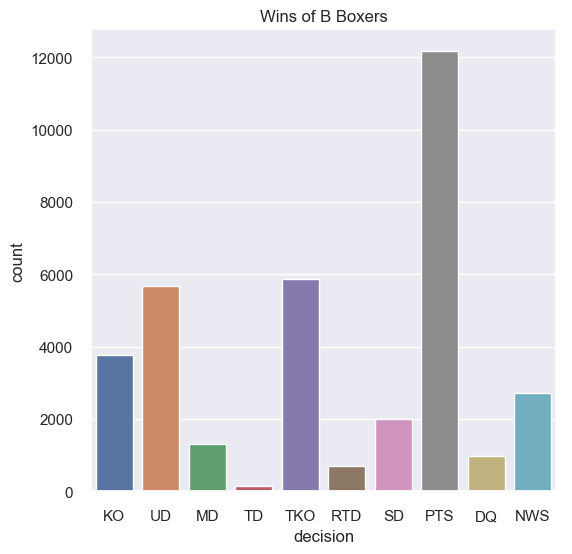

In [338]:
sns.set(style="darkgrid")
f,ax = plt.subplots(1,1,figsize=(6,6))
ax.set_title('Wins of B Boxers')
sns.countplot(x= 'decision', data = df[df['result']== 'win_B'],ax=ax)


Boxer B won most of the fights by points decision.
Knockout is the 2nd most highest reason for B's wins.

From the above 2 graphs we see that A is more probabale to win matches against B by knockout. Let's verify

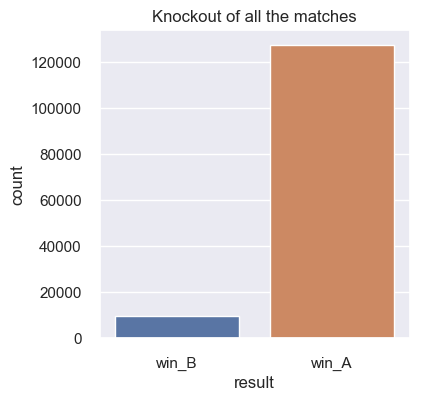

In [339]:
f,ax = plt.subplots(1,1,figsize=(4,4))
ax.set_title('Knockout of all the matches')
sns.countplot(x= 'result', data = df[(df['decision']== 'TKO') | (df['decision'] == 'KO')],ax= ax)


This indeed shows most of the knockouts are done by boxer A

Lets look deep into all the decisions for all matches

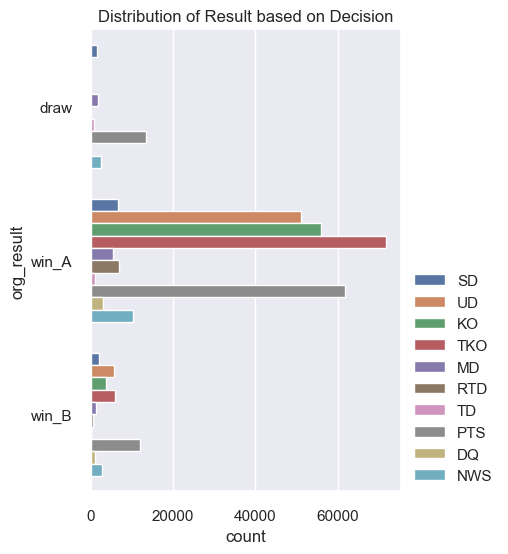

In [340]:
f,ax = plt.subplots(1,1,figsize=(4,6))
ax.set_title('Distribution of Result based on Decision')
sns.countplot(y= 'org_result', data = df,hue= 'decision',ax=ax)
plt.legend(bbox_to_anchor=(1.0,0.5))
## the chance of draw considerably increases for Split decision

We see A is overshawing B for all the decisions as excepted. We also see the chance of B winning increases when the decision is Split decision (SD) or Newspaper Decision (NWS). Lets look into it.

### 4.5 How is Split Decision and Newspaper Decision impacting the outcome of a fight?

Text(0.5,1,'Newspaper Decision Matches')

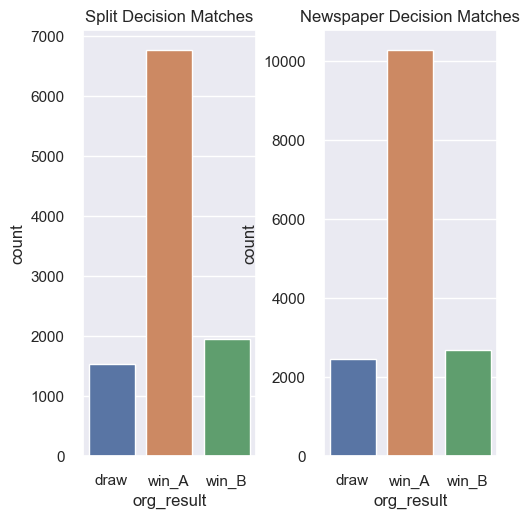

In [341]:
f,ax = plt.subplots(1,2,figsize=(5,5))
plt.tight_layout()
sns.countplot(x= 'org_result', data = df[(df['decision']== 'SD')],ax =ax[0])
sns.countplot(x= 'org_result', data = df[(df['decision']== 'NWS')],ax =ax[1])
ax[0].set_title('Split Decision Matches')
ax[1].set_title('Newspaper Decision Matches')
## the chance of draw considerably increases for Split decision

The chances of B winning increase considerably when its a Split Decision.


### 4.6 What is the most likely age of the fighters when they are knocking out the opponent?

Text(0.5,6.38889,'Age for boxer B winning by knockout')

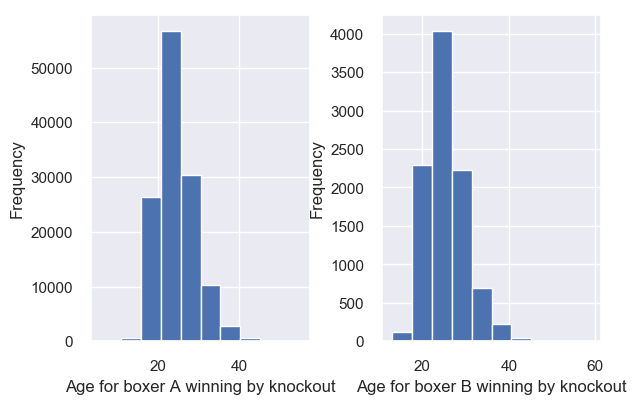

In [342]:
fig, ax =plt.subplots(1,2,figsize=(6,4))
plt.tight_layout() 
df[((df['decision']== 'TKO') | (df['decision'] == 'KO'))& (df['result'] == 'win_A')]['age_A'].plot.hist(ax = ax[0])
ax[0].set_xlabel('Age for boxer A winning by knockout')
df[((df['decision']== 'TKO') | (df['decision'] == 'KO'))& (df['result'] == 'win_B')]['age_B'].plot.hist(ax = ax[1])
ax[1].set_xlabel('Age for boxer B winning by knockout')

Here we see that 20-30 is the most likely age to knockout the opponent. We also see that the knockout events cease to exist as the age of the boxer crosses 40

The data does confirm the same. We dont have any instances where the result is draw but the decision is knock out.

We have seen that the age is more or less in the range of 20-30 when the boxer is winning the fight by knockout.
Is the same trend being followed for other reasons for wins

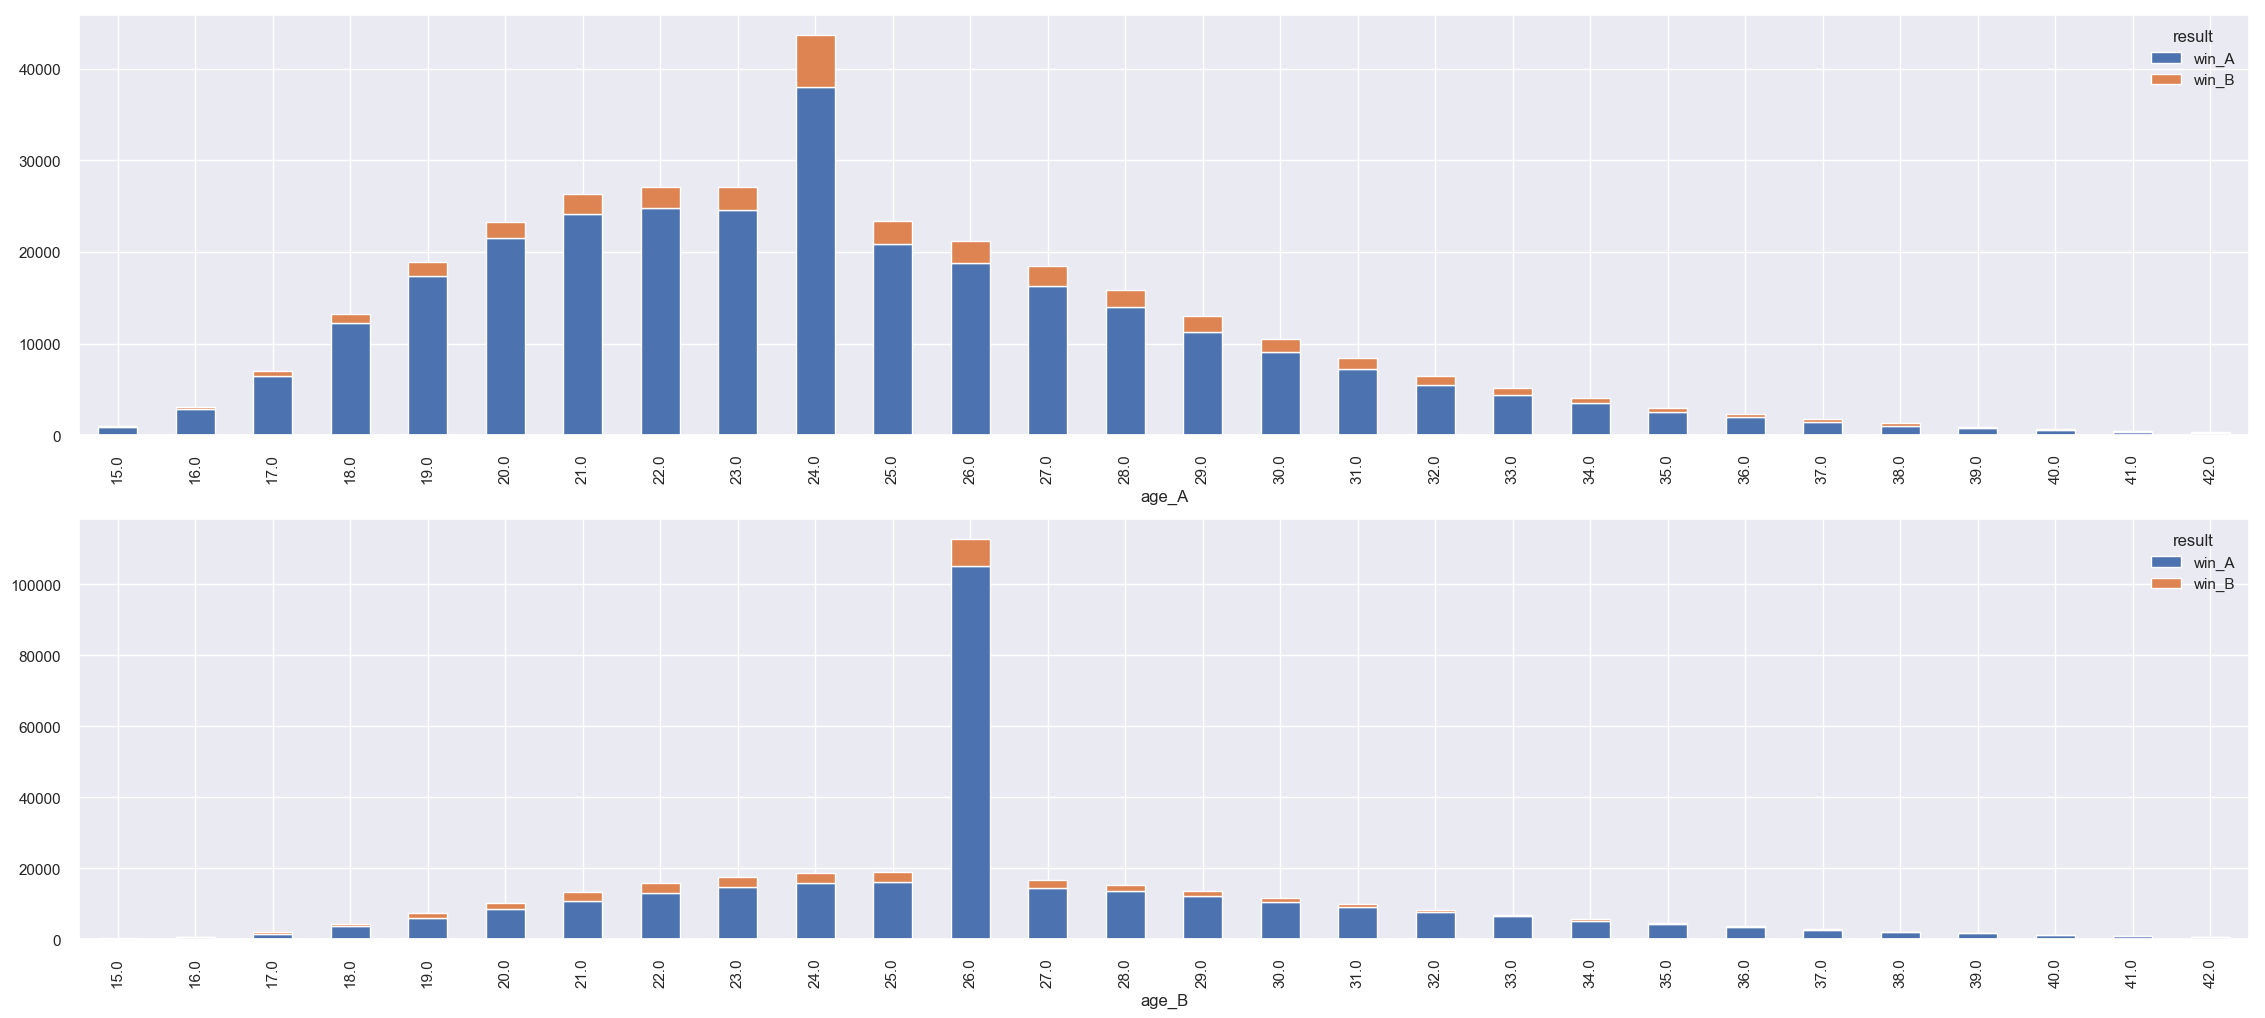

In [343]:
fig, ax =plt.subplots(2,1,figsize=(28,12))
df[(df['age_A'] >14) & (df['age_A'] <43)].groupby(['age_A', 'result']).size().unstack().plot(kind='bar', stacked=True,ax = ax[0])
df[(df['age_B'] >14) & (df['age_B'] <43)].groupby(['age_B', 'result']).size().unstack().plot(kind='bar', stacked=True,ax = ax[1])
#I have put a selection criteria on the age since the number of data point beyond that age group is very less

Here we see most of the fights are won when the boxer is in the range of 20-30. I see when the age is between 20-25 the sucess rate increases further.

We also see that the population of A boxer with age =24 is very high
We noticed the population of B boxer with age 26 is very high as well.

Why so??
This is because of the age imputation that is carried out on this data set.
Median of age_A is 24
Median of age_B is 26.


### 4.7 How is the number of past wins,loss, draws and knockouts impacting the result?

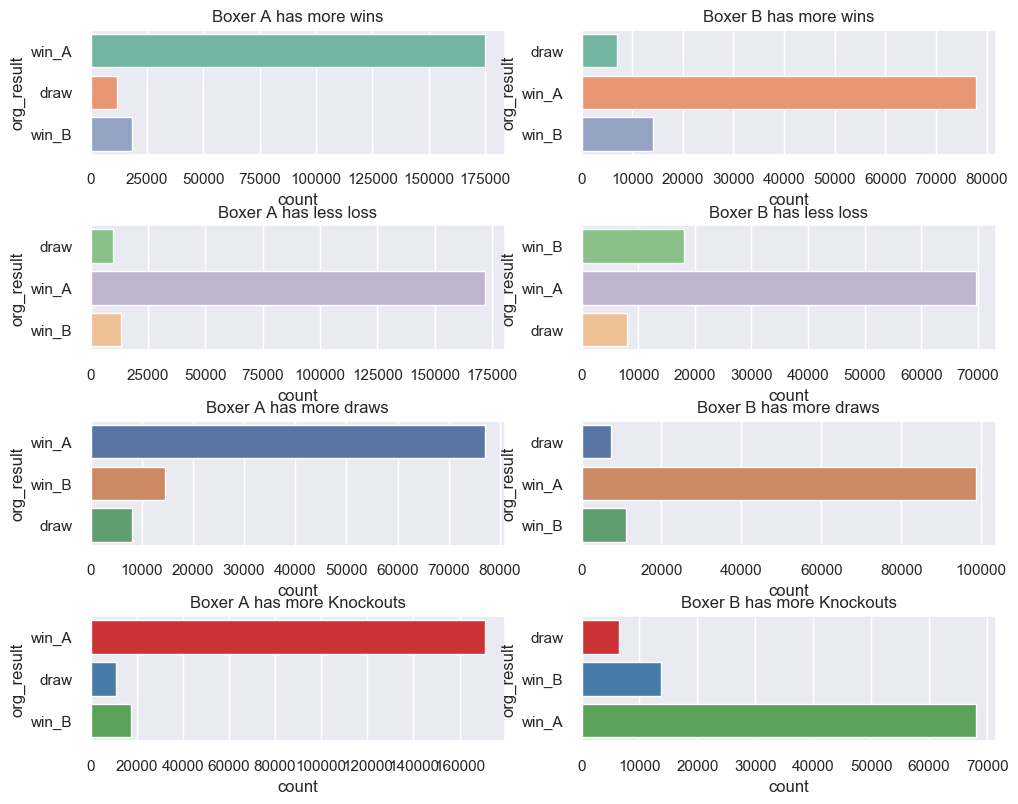

In [344]:
fig, ax =plt.subplots(4,2,figsize=(10,8))

ax[0,0].set_title('Boxer A has more wins')
ax[0,1].set_title('Boxer B has more wins')
ax[1,0].set_title('Boxer A has less loss')
ax[1,1].set_title('Boxer B has less loss')
ax[2,0].set_title('Boxer A has more draws')
ax[2,1].set_title('Boxer B has more draws')
ax[3,0].set_title('Boxer A has more Knockouts')
ax[3,1].set_title('Boxer B has more Knockouts')
plt.tight_layout() 
colors = ['lightskyblue', 'lightcoral']
sns.countplot(data = df[(df['won_A'] > df['won_B'])],y = 'org_result', ax= ax[0,0], palette="Set2")
sns.countplot(data = df[(df['won_B'] > df['won_A'])],y = 'org_result', ax= ax[0,1], palette="Set2")

sns.countplot(data = df[(df['lost_A'] < df['lost_B'])],y = 'org_result', ax= ax[1,0], palette="Accent")
sns.countplot(data = df[(df['lost_B'] < df['lost_A'])],y = 'org_result', ax= ax[1,1], palette="Accent")

sns.countplot(data = df[(df['drawn_A'] > df['drawn_B'])],y = 'org_result', ax= ax[2,0])
sns.countplot(data = df[(df['drawn_B'] > df['drawn_A'])],y = 'org_result', ax= ax[2,1])

sns.countplot(data = df[(df['kos_A'] > df['kos_B'])],y = 'org_result', ax= ax[3,0],palette="Set1")
sns.countplot(data = df[(df['kos_B'] > df['kos_A'])],y = 'org_result', ax= ax[3,1],palette="Set1")

Here we see, the chances of B winning increase, as the no of past wins of B exceeds that of Boxer A
We also noticed that the chances of B winning increases as the no of past loss of A exceeds that of Boxer B.

So these columns does have an impact on deciding the winner. 
But are these columns true representation of the performance. May be the boxer has played more matches than the opponent and hence the number of wins or knockouts are more.
The percentage of wins/knockout should give a better understanding on the result

In [345]:
df.columns

Index(['age_A', 'age_B', 'won_A', 'won_B', 'lost_A', 'lost_B', 'drawn_A',
       'drawn_B', 'kos_A', 'kos_B', 'result', 'decision', 'missing_age_A',
       'missing_age_B', 'total match A', 'total match B', 'won percentage A',
       'won percentage B', 'lost percentage A', 'lost percentage B',
       'kos percentage A', 'kos percentage B', 'org_result', 'A won advantage',
       'A kos advantage', 'A loss advantage'],
      dtype='object')

### 4.8 How was A boxer's and B boxer's past performance?

Text(0.5,28.3889,'Lost Percentage for B')

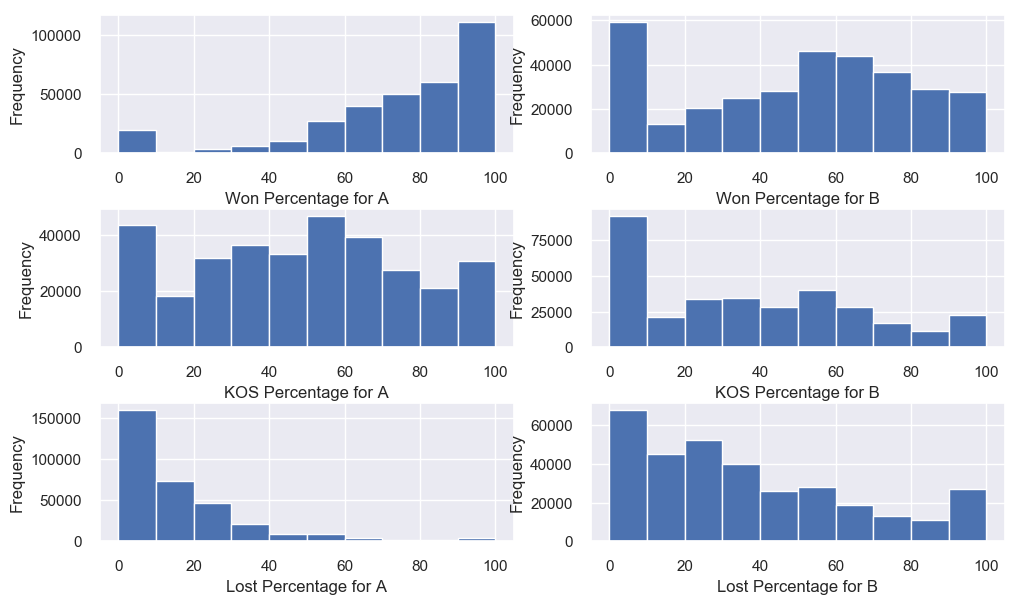

In [346]:
fig, ax =plt.subplots(3,2,figsize=(10,6))
plt.tight_layout() 
df['won percentage A'].plot.hist(ax = ax[0,0])
ax[0,0].set_xlabel('Won Percentage for A')
df['won percentage B'].plot.hist(ax = ax[0,1])
ax[0,1].set_xlabel('Won Percentage for B')
df['kos percentage A'].plot.hist(ax = ax[1,0])
ax[1,0].set_xlabel('KOS Percentage for A')
df['kos percentage B'].plot.hist(ax = ax[1,1])
ax[1,1].set_xlabel('KOS Percentage for B')
df['lost percentage A'].plot.hist(ax = ax[2,0])
ax[2,0].set_xlabel('Lost Percentage for A')
df['lost percentage B'].plot.hist(ax = ax[2,1])
ax[2,1].set_xlabel('Lost Percentage for B')


This shows that A Boxer are better than B Boxers in terms of performance

Won percentage for A mostly lie within 80-100%. Very few A boxers has won percentage < 40%.
Almost 50% of A boxer has lost percentage within 10%.

Boxer B has more won percentage in the range of 50%-70%.Huge chunk of B boxers has won percentage < 40%

A lot of B boxers has lost percentage within 80-100%
Very few A boxers has lost percentage greater than 50%.

We see a spike for won percentage, Knockout percentage and Lost percentage within 0-10%.

This is because a lot of Boxers are new and they havent played any macthes yet.



Lets look at the violin plot of the won percentage

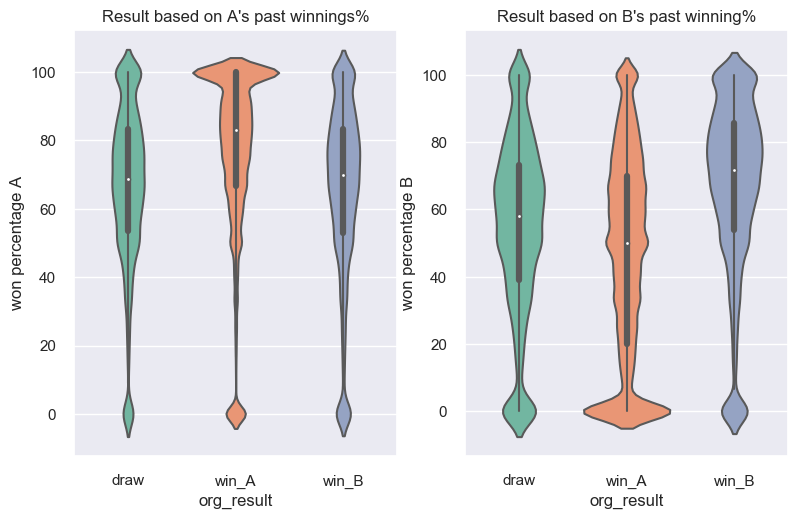

In [347]:
#df['A kos advantage']= df['kos percentage A'] > df['kos percentage B']
#df['A experience advantage']= df['total match A'] > df['total match B']
#df['A loss indicator'] = df['lost_A'] > df['lost_B']

fig, ax =plt.subplots(1,2,figsize=(8,5))
plt.tight_layout()

ax[0].set_title("Result based on A's past winnings%")
ax[1].set_title("Result based on B's past winning%")

sns.violinplot('org_result','won percentage A', kind='point', data = df, palette="Set2",ax= ax[0])
sns.violinplot('org_result','won percentage B', kind='point', data = df, palette="Set2",ax= ax[1])

Here we see, boxer A with won percentage > 90% has more chances of winning.
Boxer A with won percentage < 45% has more chance of loosing or drawing the match.

Boxer B with won percentage around 45-55% is equally likely to loose or draw the match.
Boxer B with won percentage <20% will more likely end up with a loss or draw.
Boxer B with won percentage > 90% has more chances of winning.



### 4.9 How were boxers doing when they had better winning rate than the opponent?

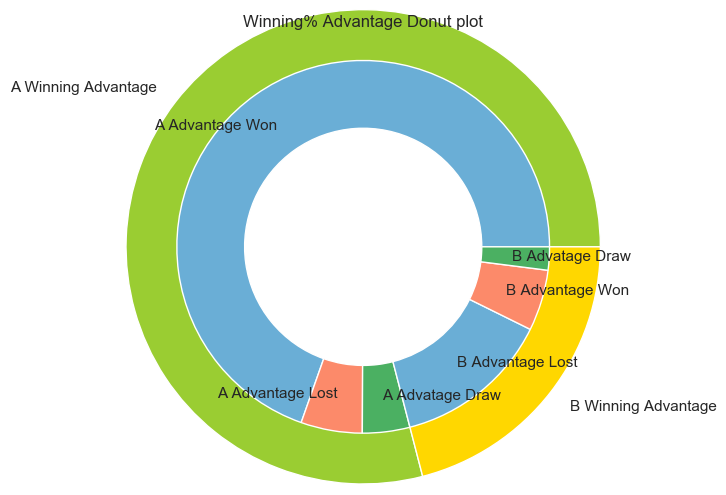

In [348]:
#Create won advantage Indicators
df['A won advantage']= df['won percentage A'] >= df['won percentage B']

## Create knockout advantage Indicators
df['A kos advantage']= df['kos percentage A'] >= df['kos percentage B']

## Create knockout advantage Indicators
df['A loss advantage']= df['lost percentage A'] < df['lost percentage B']


# Make data: 
group_names=['A Winning Advantage', 'B Winning Advantage']
group_size=[260313,69045]
subgroup_names=['A Advantage Won','A Advantage Lost','A Advatage Draw','B Advantage Lost','B Advantage Won','B Advatage Draw']
subgroup_size=[229233,17539,13541,44995,17428,6622]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.4, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.4, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.4-0.3, labels=subgroup_names, labeldistance=0.8, colors=[a(0.5), b(0.4), c(0.6), a(0.5), b(0.4), c(0.6)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title('Winning% Advantage Donut plot')
# show it
plt.show()

Here we see that A Boxers are winning most of the matches where A has winning% advantages. 

However B Boxer are loosing most of the matches ever after having winning% advantage. But the chances of B wiining increase considerably when the B Boxer has winning% advantage.

Lets look at the losses of A and B even after having winning advantage

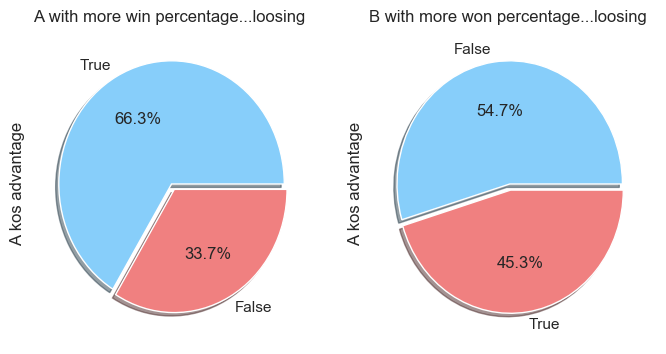

In [349]:
f,ax = plt.subplots(1,2,figsize=(8,4))
colors = ['lightskyblue', 'lightcoral']
ax[0].set_title('A with more win percentage...loosing ')
ax[1].set_title('B with more won percentage...loosing ')
df[(df['A won advantage']== True)  & (df['result']== 'win_B')]['A kos advantage'].value_counts().plot.pie(explode=[0,0.05],colors=colors, autopct='%1.1f%%',ax=ax[0],shadow=True)
df[(df['A won advantage']== False) & (df['result']== 'win_A')]['A kos advantage'].value_counts().plot.pie(explode=[0,0.05],colors=colors, autopct='%1.1f%%',ax=ax[1],shadow=True)


When A is loosing the fighter after having winning% advantage, the opponent has Knockout advantage 33% of the time
When B is loosing the fighter after having winning% advantage, the opponent has Knockout advantage 45% of the time


### 4.10 How were boxers doing when they had better winning  and kockout rate than the opponent?

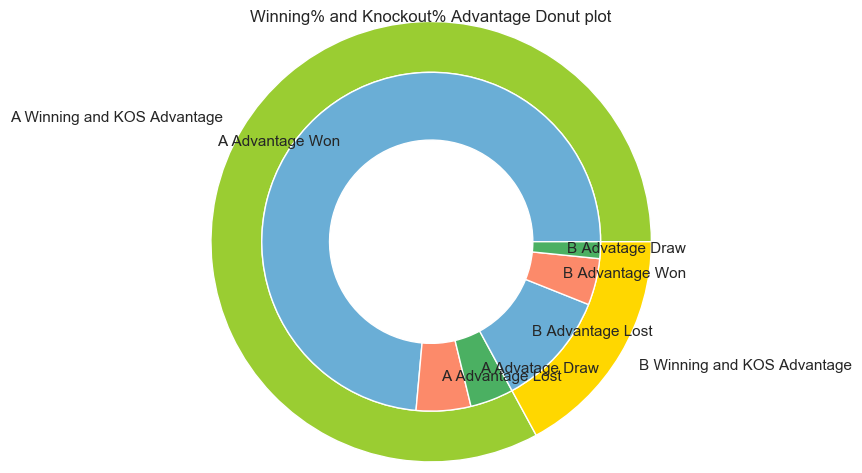

In [350]:
# Make data: 
group_names=['A Winning and KOS Advantage', 'B Winning and KOS Advantage']
group_size=[185215,38167]
subgroup_names=['A Advantage Won','A Advantage Lost','A Advatage Draw','B Advantage Lost','B Advantage Won','B Advatage Draw']
subgroup_size=[164351,11626,9238,24666,9927,3574]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.3, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.8, colors=[a(0.5), b(0.4), c(0.6), a(0.5), b(0.4), c(0.6)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title('Winning% and Knockout% Advantage Donut plot')
# show it
plt.show()

This shows that the same pattern is followed when data is  segregated based on winning advanatge and knockout advanatge

B has lost quite a lot of these fights even after having better performance than the opponent in the past.But the chances of B winning the fight increases if they winning% and Knockout% advantage.

### 4.11 How were boxers doing when they had advantage on lossing rate?

In [352]:
df['A loss advantage'].value_counts()

True     229836
False     99522
Name: A loss advantage, dtype: int64

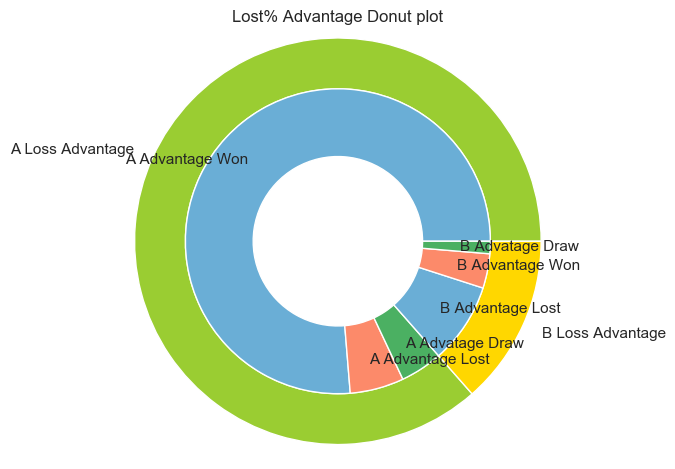

In [353]:
# Make data: 
group_names=['A Loss Advantage', 'B Loss Advantage']
group_size=[229836,35928]
subgroup_names=['A Advantage Won','A Advantage Lost','A Advatage Draw','B Advantage Lost','B Advantage Won','B Advatage Draw']
subgroup_size=[202769,15187,11880,22741,9701,3486]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.2, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.3, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.2-0.3, labels=subgroup_names, labeldistance=0.8, colors=[a(0.5), b(0.4), c(0.6), a(0.5), b(0.4), c(0.6)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title('Lost% Advantage Donut plot')
# show it
plt.show()

### 4.12 How are the new inexperienced A and B boxers doing?

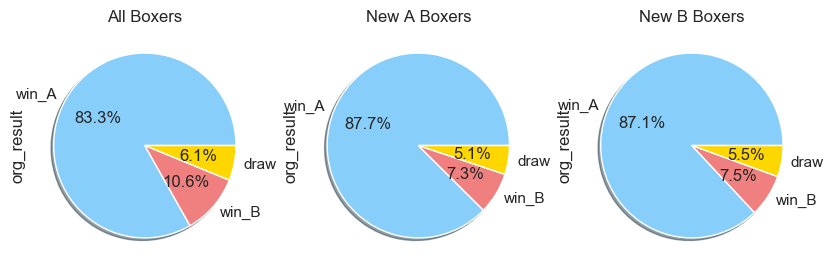

In [354]:
f,ax = plt.subplots(1,3,figsize=(10,3))
colors = ['lightskyblue', 'lightcoral','gold']
ax[0].set_title('All Boxers')
ax[1].set_title('New A Boxers')
ax[2].set_title('New B Boxers')
df['org_result'].value_counts().plot.pie(colors=colors, autopct='%1.1f%%',ax=ax[0],shadow=True)
df[(df['total match A'] <=5)]['org_result'].value_counts().plot.pie(colors=colors, autopct='%1.1f%%',ax=ax[1],shadow=True)
df[(df['total match B'] <=5)]['org_result'].value_counts().plot.pie(colors=colors, autopct='%1.1f%%',ax=ax[2],shadow=True)

Here we see that A boxers has won 83% of all the matches and B boxers has won 10.6% of all the matches

New boxers of A is outperforming the entire population by 4% (87- 83)%.

New boxers of B is underperforming the entire population by 3%.

This may mean A boxer's are trained very well before the match than B Boxers

 ### 4.13 What's the age of the oppoent when the new Boxers are playing ?

In [355]:
print("Mean age of New A Boxer's :" + str(df[(df['total match A'] <=5) & (df['missing_age_A']== False)]['age_A'].mean()))
print("Mean age of New A Boxer's opponent :" + str(df[(df['total match A'] <=5) & (df['missing_age_B']== False)]['age_B'].mean()))
print("Mean age of New B Boxer's :" + str(df[(df['total match B'] <=5) & (df['missing_age_B']== False)]['age_B'].mean()))
print("Mean age of New B Boxer's opponent :" + str(df[(df['total match B'] <=5) & (df['missing_age_A']== False)]['age_A'].mean()))

Mean age of New A Boxer's :22.486437370592704
Mean age of New A Boxer's opponent :26.302669049629788
Mean age of New B Boxer's :24.503695730175817
Mean age of New B Boxer's opponent :23.060088942687226


This shows that New A Boxer's are fighting against older opponent more often than not.

While the New B Boxer's are fighting against comparatively younger opponent. THis add up to their chances of more losses.

##### Which group has more boxers with no experience

In [356]:
print(df[df['total match A']== 0].shape)
print(df[df['total match B']== 0].shape)

(14545, 26)
(25246, 26)


B has more inexperienced boxers than A

**Using seaborn box-plot**

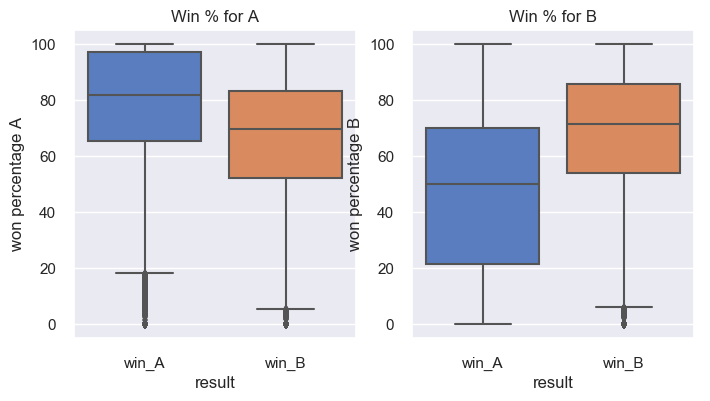

In [357]:
f,ax = plt.subplots(1,2,figsize=(8,4))
sns.set(style="whitegrid", palette="muted")
ax[0].set_title('Win % for A')
ax[1].set_title('Win % for B')
sns.boxplot(x="result", y="won percentage A", data=df,ax= ax[0])
sns.boxplot(x="result", y="won percentage B", data=df,ax= ax[1])

This shows that A boxer who has won percentage greater than 80%, is more likely to win. 
B Boxer who has won pecentage less than 40% is more likely to loss

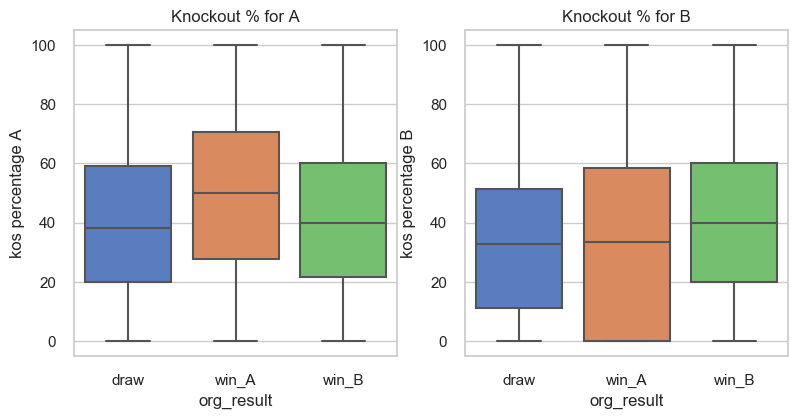

In [360]:
f,ax = plt.subplots(1,2,figsize=(8,4))
sns.set(style="whitegrid", palette="muted")
plt.tight_layout()
ax[0].set_title('Knockout % for A')
ax[1].set_title('Knockout % for B')
sns.boxplot(x="org_result", y="kos percentage A", data=df,ax= ax[0])
sns.boxplot(x="org_result", y="kos percentage B", data=df,ax= ax[1])

There is no Outlier in this Boxplot. Quite a few B boxer has knockout percentage as zero. They are most likely to loss.
B boxer with knockout % less than 20% will most likely to end up with a draw or loss.

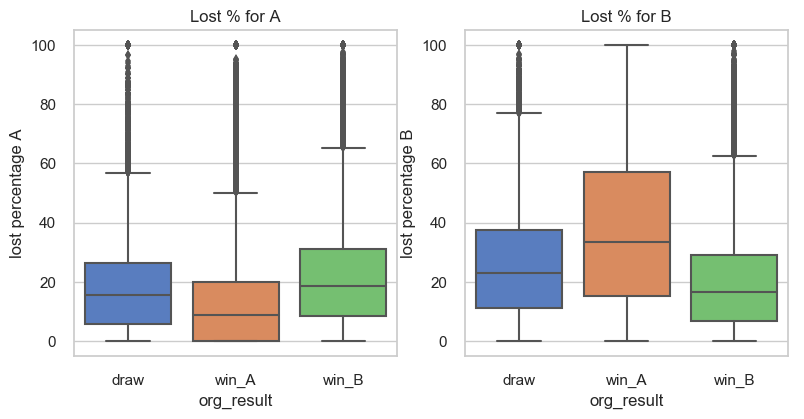

In [362]:
f,ax = plt.subplots(1,2,figsize=(8,4))
sns.set(style="whitegrid", palette="muted")
plt.tight_layout()
ax[0].set_title('Lost % for A')
ax[1].set_title('Lost % for B')
sns.boxplot(x="org_result", y="lost percentage A", data=df,ax= ax[0])
sns.boxplot(x="org_result", y="lost percentage B", data=df,ax= ax[1])

**There are a large number of outliers in this boxplot. B Boxer with lost percentage between 40-60% is most likely to lose the match.**

win_A    11089
win_B     7358
draw      2162
Name: org_result, dtype: int64


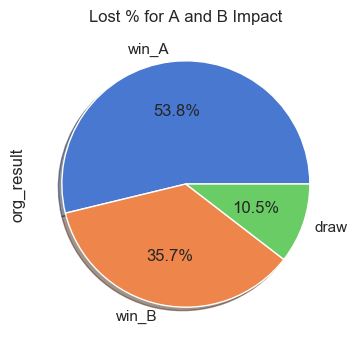

In [364]:
## Here we see when lost percentage of A is >= 20 and lost percentage of B is < 20 and B is not a newBoer, 
## the chances of B winning increases 3 folds 
print(df[(df['lost percentage A'] >= 20) & (df['lost percentage B'] < 20)& (df['total match B'] >= 5) ]['org_result'].value_counts())

f,ax = plt.subplots(1,1,figsize=(4,4))
ax.set_title('Lost % for A and B Impact')
df[(df['lost percentage A'] >= 20) & (df['lost percentage B'] < 20)& (df['total match B'] >= 5) ]['org_result'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

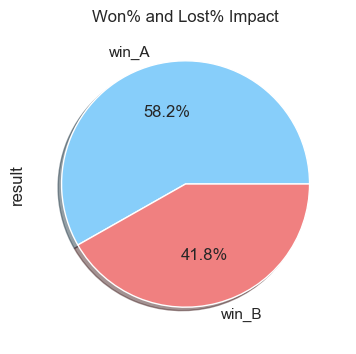

In [365]:
#colors = ['lightskyblue', 'lightcoral','gold']
#df[(df['lost percentage A'] >= 20) & (df['lost percentage B'] < 20)& (df['total match B'] >= 5) ]['result'].value_counts()
f,ax = plt.subplots(1,1,figsize=(4,4))
ax.set_title('Won% and Lost% Impact')
df[(df['won percentage B'] > 80) &(df['lost percentage A'] >= 20) & (df['lost percentage B'] < 20)& (df['total match B'] >= 5) ]['result'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax,colors=colors,shadow=True)

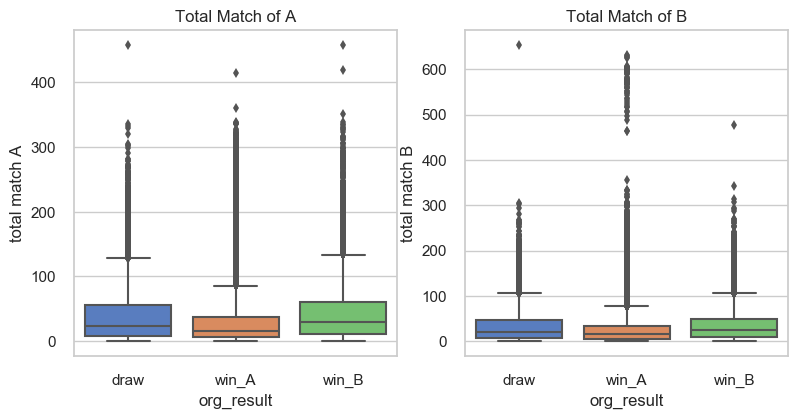

In [367]:
f,ax = plt.subplots(1,2,figsize=(8,4))
sns.set(style="whitegrid", palette="muted")
plt.tight_layout()
ax[0].set_title('Total Match of A')
ax[1].set_title('Total Match of B')
sns.boxplot(x="org_result", y="total match A", data=df,ax= ax[0])
sns.boxplot(x="org_result", y="total match B", data=df,ax= ax[1])

In [369]:
#Here we see when the total match of B exceeds 300, B is lossing almost every match
df[df['total match B'] >= 300]['org_result'].value_counts()


win_A    79
win_B     4
draw      3
Name: org_result, dtype: int64

### 4.14 Segment win percentage in bins with size 10.

In [370]:
for i in range(10,0,-1):
        df.loc[ df['won percentage A'] <= i*10, 'won percentage A_bin'] = i

In [371]:
for i in range(10,0,-1):
        df.loc[ df['won percentage B'] <= i*10, 'won percentage B_bin'] = i

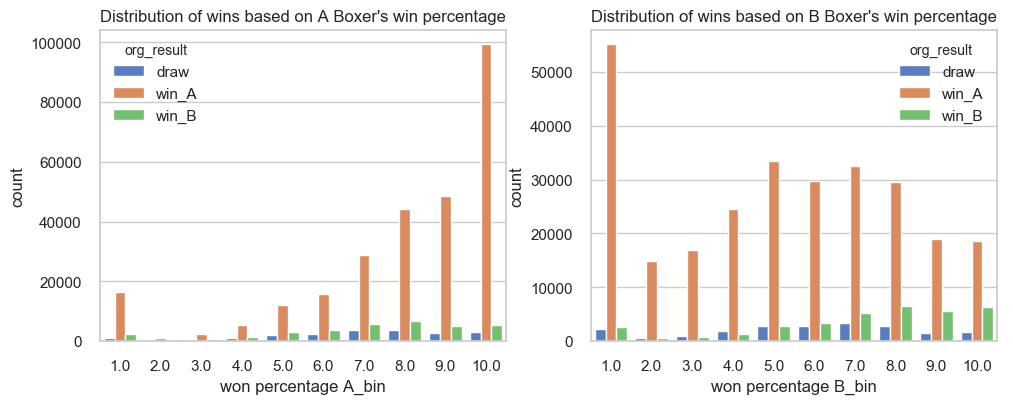

In [372]:
f,ax = plt.subplots(1,2,figsize=(10,4))
colors = ['lightskyblue', 'lightcoral','gold']
ax[0].set_title("Distribution of wins based on A Boxer's win percentage")
ax[1].set_title("Distribution of wins based on B Boxer's win percentage")
plt.tight_layout() 

sns.countplot(x = "won percentage A_bin",  hue = "org_result", data = df,ax = ax[0])

sns.countplot(x = "won percentage B_bin",  hue = "org_result", data = df,ax = ax[1])

plt.show()

Here we see that,

A has maximum chance of winning when 

    1> A has win percentage within 91-100%
    2> B has win percenatge within 0-20%
    
B has maximum chance of winning when 

    1>A has win percentage within 0-10%
    2>B has win percentage within 91-100%
    

### 4.15 Segment age in bins with size 10.

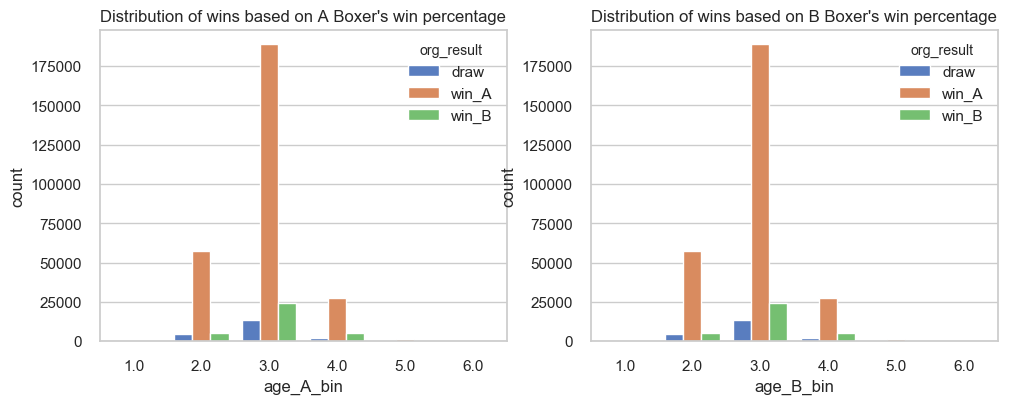

In [373]:
for i in range(10,0,-1):
        df.loc[ df['age_A'] <= i*10, 'age_A_bin'] = i
        
for i in range(10,0,-1):
        df.loc[ df['age_A'] <= i*10, 'age_B_bin'] = i
        
f,ax = plt.subplots(1,2,figsize=(10,4))
colors = ['lightskyblue', 'lightcoral','gold']
ax[0].set_title("Distribution of wins based on A Boxer's win percentage")
ax[1].set_title("Distribution of wins based on B Boxer's win percentage")
plt.tight_layout() 

sns.countplot(x = "age_A_bin",  hue = "org_result", data = df,ax = ax[0])

sns.countplot(x = "age_B_bin",  hue = "org_result", data = df,ax = ax[1])

plt.show()

The above graph doesnt show us how the boxer of age >40 are perfroming for A and B

Text(0.5,1,'Win rate when age of B > 40')

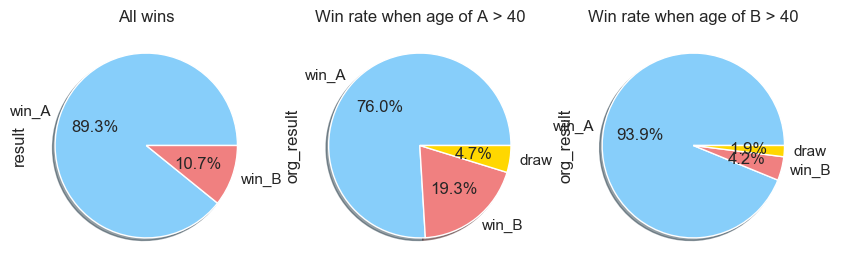

In [375]:
f,ax = plt.subplots(1,3,figsize=(10,3))
colors = ['lightskyblue', 'lightcoral','gold']

df['result'].value_counts().plot.pie( autopct='%1.1f%%',ax=ax[0],colors=colors,shadow=True)
df[df['age_A'] > 40] ['org_result'].value_counts().plot.pie( autopct='%1.1f%%',ax=ax[1],colors=colors,shadow=True)
df[df['age_B'] > 40]['org_result'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],colors=colors,shadow=True)

ax[0].set_title('All wins')
ax[1].set_title('Win rate when age of A > 40')
ax[2].set_title('Win rate when age of B > 40')

Here we see overaged A and B boxers are underperforming than the entire population.

However, we see Overaged B Boxer are unperforming very badly. They are likely to win just 4% of the total matches. 

In [376]:
df.columns

Index(['age_A', 'age_B', 'won_A', 'won_B', 'lost_A', 'lost_B', 'drawn_A',
       'drawn_B', 'kos_A', 'kos_B', 'result', 'decision', 'missing_age_A',
       'missing_age_B', 'total match A', 'total match B', 'won percentage A',
       'won percentage B', 'lost percentage A', 'lost percentage B',
       'kos percentage A', 'kos percentage B', 'org_result', 'A won advantage',
       'A kos advantage', 'A loss advantage', 'won percentage A_bin',
       'won percentage B_bin', 'age_A_bin', 'age_B_bin'],
      dtype='object')

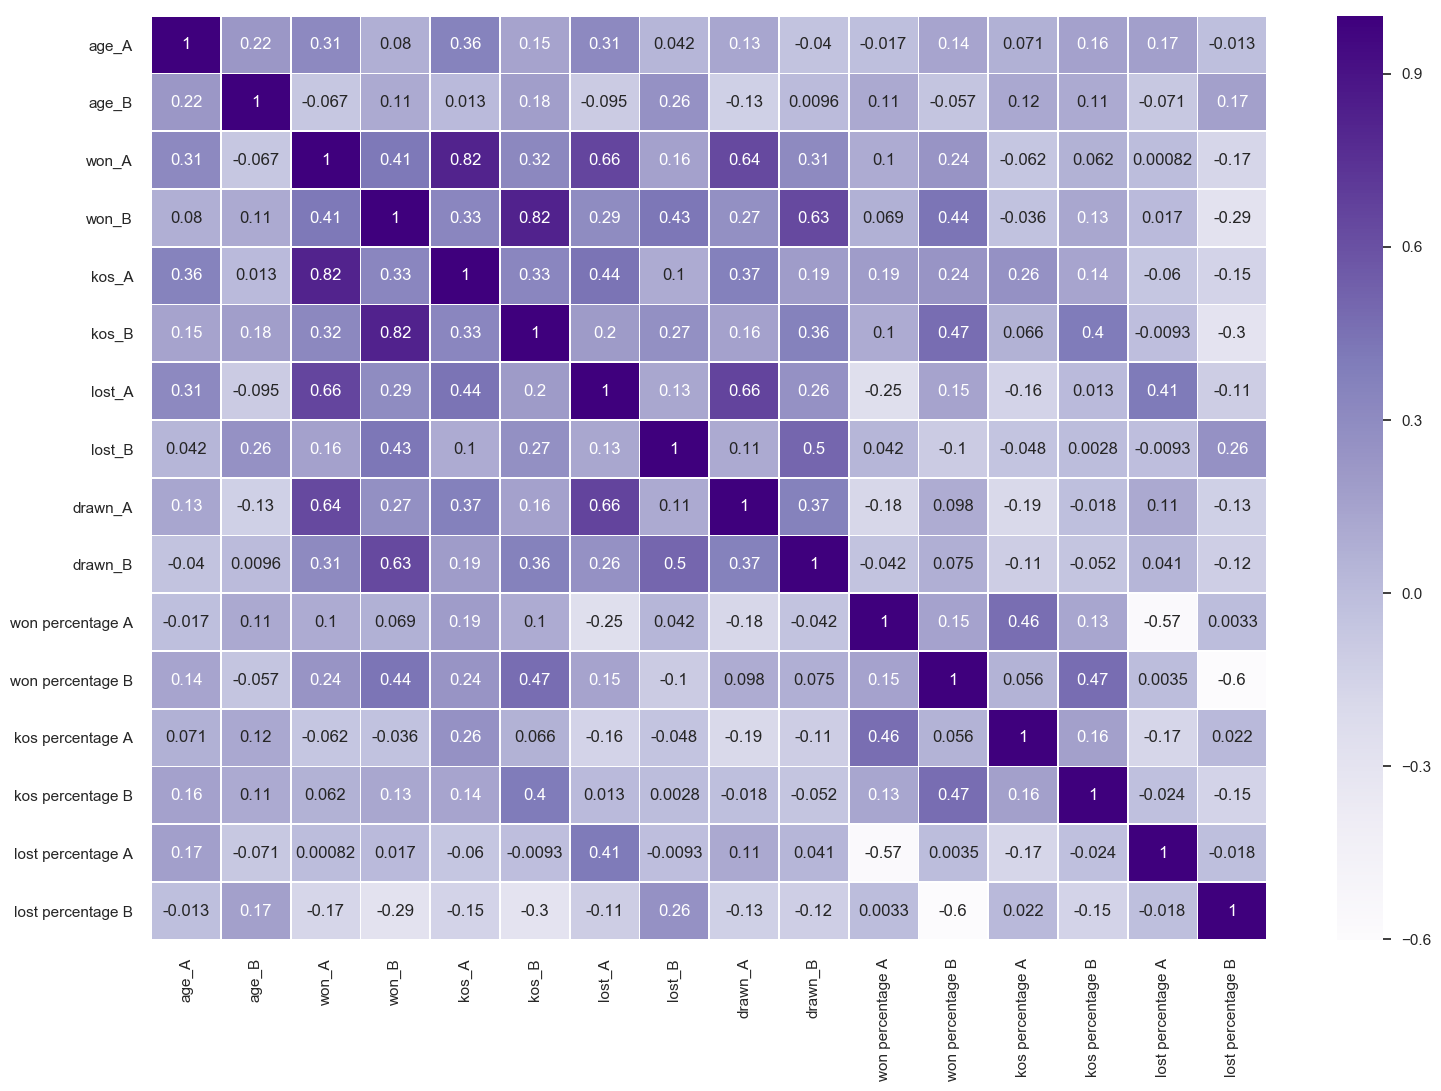

In [377]:
df2 = df[['age_A', 'age_B','won_A', 'won_B','kos_A', 'kos_B','lost_A', 'lost_B','drawn_A', 'drawn_B','won percentage A', 'won percentage B','kos percentage A', 'kos percentage B','lost percentage A','lost percentage B' ]]
fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
sns.heatmap(df2.corr(),annot= True, linewidths=.5, ax=ax,cmap = "Purples")

kos and won columns is very tightly correlated

won drawn and lost columns are tighly correlated as well

In [378]:
##Now we have a  column including both kos and won so we can remove the individual columns
## lost and draw columns are dropped since we have used them to create won percentage 

df.drop(columns = ['won_A', 'won_B', 'lost_A', 'lost_B','drawn_A','drawn_B', 'kos_A', 'kos_B'],inplace = True)

In [99]:
df.drop(columns= ['missing_age_A', 'missing_age_B','age_A_bin', 'age_B_bin','won percentage A_bin', 'won percentage B_bin','A loss advantage'],inplace = True)

In [382]:
## Drop the original Result...since we are going to use the result column to predict only wins.

df.drop(columns = ['org_result'], inplace = True)

## 5. Conclusion 

- The Boxing Data helps us to understand the outcome of the boxing matches.
- Total of __387427__ entries were present out of which around 44838 entries are of new Boxing fights where atleast one of the Team is playing a new Player.
- A Team is winning most of the fights 
- More new boxers are playing from B Team. New Boxers of B team are playing comparatively younger boxers of A Team. These new boxers are  winning only 7% of the fights 
- Inexperienced Boxer of A Team are playing against older opponent. They are winning most of the fight (87%)
- A Team is winning most of the matches when the decision is undecided or NewsPaper Decision
- A Team and B Team Boxers has higher chances of winning when they are fighting against older opponent
- Older boxers of A Team and B Team is not performing well compared to the entire population
- A huge chunk of B Boxers has win percentage within 50-70%
- A huge chunk of A Boxers has win percentage within 80-100% and lost percentage <10%
- Boxers of A Team are more aggresive than B Team boxers. So they are winning most of the matches by knocking out the opponent.
- Experienced B Boxer has 3 times more chance to win if the lost percentage of A is >= 20% and lost percentage of B is< 20% .This probablity increase even further when B has won percentage > 80.
- From the analyis, it was concluded that winning percentage, knockout percentage and lost percentage were the main parameters affecting the result of the match. Age Difference also plays a role along with experience of the boxers. We are going to predict only the wins of the boxers( Draws wont be predicted for any match)